### Infosys 722 - Iteration 4 BDAS (Steps 1-8)
Submitted by: Sym Concepcion
UPI: scon497, studentID: 829972794

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')

In [2]:
# import other packages
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import klib
from pyspark.sql.functions import avg, format_number, stddev
import pyspark.sql.functions as F

# For Data Manipulation
from pyspark.sql.types import (StructField,StringType,IntegerType,BooleanType,StructType)

In [3]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722Basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/12 01:23:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Let's read in the data. There are 2 sources so we can integrate later. 
# Note that it's in the format of csv
df1 = spark.read.option("header", True).csv('dataset/data_ncr.csv')
df2 = spark.read.option("header", True).csv('dataset/data_therest.csv')

In [5]:
# df.show()
print("Files read into structure of",type(df1))
print("First dataset (NCR):", df1.count(), "x", len(df1.columns))
print("Second dataset (Rest of the regions):", df2.count(), "x", len(df2.columns))

Files read into structure of <class 'pyspark.sql.dataframe.DataFrame'>
First dataset (NCR): 4130 x 60
Second dataset (Rest of the regions): 37414 x 60


In [6]:
# integrate the 2 sources
# code adapted from https://www.geeksforgeeks.org/merge-two-dataframes-in-pyspark/
import functools 
def unionAll(dfs):
    return functools.reduce(lambda df1, df2: df1.union(df2.select(df1.columns)), dfs)

statsdata = unionAll([df1, df2])

In [7]:
print("Combined dataset:", statsdata.count(), "x", len(statsdata.columns))
statsdata.printSchema()

Combined dataset: 41544 x 60
root
 |-- Total Household Income: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Total Food Expenditure: string (nullable = true)
 |-- Main Source of Income: string (nullable = true)
 |-- Agricultural Household indicator: string (nullable = true)
 |-- Bread and Cereals Expenditure: string (nullable = true)
 |-- Total Rice Expenditure: string (nullable = true)
 |-- Meat Expenditure: string (nullable = true)
 |-- Total Fish and  marine products Expenditure: string (nullable = true)
 |-- Fruit Expenditure: string (nullable = true)
 |-- Vegetables Expenditure: string (nullable = true)
 |-- Restaurant and hotels Expenditure: string (nullable = true)
 |-- Alcoholic Beverages Expenditure: string (nullable = true)
 |-- Tobacco Expenditure: string (nullable = true)
 |-- Clothing, Footwear and Other Wear Expenditure: string (nullable = true)
 |-- Housing and water Expenditure: string (nullable = true)
 |-- Imputed House Rental Value: string (null

In [8]:
statsdata.dtypes

[('Total Household Income', 'string'),
 ('Region', 'string'),
 ('Total Food Expenditure', 'string'),
 ('Main Source of Income', 'string'),
 ('Agricultural Household indicator', 'string'),
 ('Bread and Cereals Expenditure', 'string'),
 ('Total Rice Expenditure', 'string'),
 ('Meat Expenditure', 'string'),
 ('Total Fish and  marine products Expenditure', 'string'),
 ('Fruit Expenditure', 'string'),
 ('Vegetables Expenditure', 'string'),
 ('Restaurant and hotels Expenditure', 'string'),
 ('Alcoholic Beverages Expenditure', 'string'),
 ('Tobacco Expenditure', 'string'),
 ('Clothing, Footwear and Other Wear Expenditure', 'string'),
 ('Housing and water Expenditure', 'string'),
 ('Imputed House Rental Value', 'string'),
 ('Medical Care Expenditure', 'string'),
 ('Transportation Expenditure', 'string'),
 ('Communication Expenditure', 'string'),
 ('Education Expenditure', 'string'),
 ('Miscellaneous Goods and Services Expenditure', 'string'),
 ('Special Occasions Expenditure', 'string'),
 ('Cr

In [9]:
statsdata.head()

22/10/12 01:23:58 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Row(Total Household Income='623738', Region='NCR', Total Food Expenditure='133762', Main Source of Income='Wage/Salaries', Agricultural Household indicator='0', Bread and Cereals Expenditure='21969', Total Rice Expenditure='13000', Meat Expenditure='15192', Total Fish and  marine products Expenditure='10438', Fruit Expenditure='3690', Vegetables Expenditure='5208', Restaurant and hotels Expenditure='52640', Alcoholic Beverages Expenditure='0', Tobacco Expenditure='0', Clothing, Footwear and Other Wear Expenditure='13548', Housing and water Expenditure='124170', Imputed House Rental Value='84000', Medical Care Expenditure='5784', Transportation Expenditure='19440', Communication Expenditure='19188', Education Expenditure='0', Miscellaneous Goods and Services Expenditure='41436', Special Occasions Expenditure='8200', Crop Farming and Gardening expenses='0', Total Income from Entrepreneurial Acitivites='0', Household Head Sex='Male', Household Head Age='62', Household Head Marital Status=

In [10]:
statsdata.show(1, vertical=True)

-RECORD 0-------------------------------------------------------------
 Total Household Income                        | 623738               
 Region                                        | NCR                  
 Total Food Expenditure                        | 133762               
 Main Source of Income                         | Wage/Salaries        
 Agricultural Household indicator              | 0                    
 Bread and Cereals Expenditure                 | 21969                
 Total Rice Expenditure                        | 13000                
 Meat Expenditure                              | 15192                
 Total Fish and  marine products Expenditure   | 10438                
 Fruit Expenditure                             | 3690                 
 Vegetables Expenditure                        | 5208                 
 Restaurant and hotels Expenditure             | 52640                
 Alcoholic Beverages Expenditure               | 0                    
 Tobac

In [11]:
statsdata.limit(5).toPandas()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,623738,NCR,133762,Wage/Salaries,0,21969,13000,15192,10438,3690,...,1,1,1,0,1,3,1,1,0,0
1,301900,NCR,109815,Wage/Salaries,0,22158,17550,14679,4260,3420,...,1,1,0,0,0,2,1,0,0,0
2,169200,NCR,47653,Other sources of Income,0,13260,8450,3370,1080,120,...,0,1,0,0,0,2,1,0,0,0
3,428200,NCR,179808,Wage/Salaries,0,20996,12350,24016,7920,3550,...,1,1,1,0,0,2,1,0,0,0
4,283100,NCR,123872,Other sources of Income,0,17060,13350,18478,13320,3830,...,1,1,0,0,0,2,1,0,0,0


In [12]:
# classify columns 
print("Columns can be classified into 3 types of information:")

def classifyDataColumns(statsdata):
    print("Information about Income")
    stringCol_income = "Income"
    cols_income = [col for col in statsdata.columns if stringCol_income.casefold() in col.casefold()]
    print(len(cols_income), cols_income)
    print()

    print("Information about Expenditure Details")
    stringCol_expense = "expen"
    cols_expense = [col for col in statsdata.columns if stringCol_expense.casefold() in col.casefold()]
    print(len(cols_expense), cols_expense)
    print()

    print("Information about Household Details")
    cols_HH = [col for col in statsdata.columns if ((stringCol_expense.casefold() not in col.casefold()) and (stringCol_income.casefold() not in col.casefold()))]
    print(len(cols_HH), cols_HH)
    print()

    data = [len(cols_income), len(cols_expense), len(cols_HH)]
    label = ['About Income', 'About Expenses', 'About Household Details']

    plt.pie(data, labels=label, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), explode=[0,0,0], shadow=True, startangle=90)
    plt.title('Information Column Classification')
    plt.axis('equal')
    plt.show()
    #autopct='%1.1f%%'

Columns can be classified into 3 types of information:


Information about Income
3 ['Total Household Income', 'Main Source of Income', 'Total Income from Entrepreneurial Acitivites']

Information about Expenditure Details
19 ['Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']

Information about Household Details
38 ['Region', 'Agricultural Household indicator', 'Imputed House Rental Value', 'Household Head Sex', 'Household Head Age', 'Household Head Marital Status', 'Household Head Highest Grad

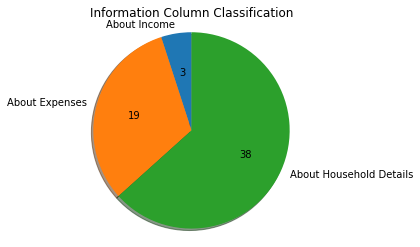

In [13]:
classifyDataColumns(statsdata)

### Data Description

In [14]:
statsdata.describe('Total Household Income').show()

+-------+----------------------+
|summary|Total Household Income|
+-------+----------------------+
|  count|                 41544|
|   mean|    247555.58480165608|
| stddev|     286880.5226527398|
|    min|                100000|
|    max|                 99997|
+-------+----------------------+



In [15]:
statsdata.describe('Medical Care Expenditure').show()

+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   41544|
|   mean|       7160.230935875216|
| stddev|      26902.002274617334|
|    min|                       0|
|    max|                    9998|
+-------+------------------------+



In [16]:
statsdata.describe('Medical Care Expenditure', 'Total Household Income').show()

+-------+------------------------+----------------------+
|summary|Medical Care Expenditure|Total Household Income|
+-------+------------------------+----------------------+
|  count|                   41544|                 41544|
|   mean|       7160.230935875216|    247555.58480165608|
| stddev|      26902.002274617334|     286880.5226527398|
|    min|                       0|                100000|
|    max|                    9998|                 99997|
+-------+------------------------+----------------------+



### Data Manipulation

In [17]:
# create a variable with the correct structure

data_schema = [StructField('Total Household Income',IntegerType(),True), StructField('Region',StringType(),True),
              StructField('Total Food Expenditure',IntegerType(),True), StructField('Main Source of Income',StringType(),True),
              StructField('Agricultural Household indicator',IntegerType(),True), StructField('Bread and Cereals Expenditure',IntegerType(),True),
              StructField('Total Rice Expenditure',IntegerType(),True), StructField('Meat Expenditure',IntegerType(),True),
              StructField('Total Fish and  marine products Expenditure',IntegerType(),True), StructField('Fruit Expenditure',IntegerType(),True),
              StructField('Vegetables Expenditure',IntegerType(),True), StructField('Restaurant and hotels Expenditure',IntegerType(),True),
              StructField('Alcoholic Beverages Expenditure',IntegerType(),True), StructField('Tobacco Expenditure',IntegerType(),True),
              StructField('Clothing, Footwear and Other Wear Expenditure',IntegerType(),True), StructField('Housing and water Expenditure',IntegerType(),True),
              StructField('Imputed House Rental Value',IntegerType(),True), StructField('Medical Care Expenditure',IntegerType(),True),
              StructField('Transportation Expenditure',IntegerType(),True), StructField('Communication Expenditure',IntegerType(),True),
              StructField('Education Expenditure',IntegerType(),True), StructField('Miscellaneous Goods and Services Expenditure',IntegerType(),True),
              StructField('Special Occasions Expenditure',IntegerType(),True), StructField('Crop Farming and Gardening expenses',IntegerType(),True),
              StructField('Total Income from Entrepreneurial Acitivites',IntegerType(),True), StructField('Household Head Sex',StringType(),True),
              StructField('Household Head Age',IntegerType(),True), StructField('Household Head Marital Status',StringType(),True),
              StructField('Household Head Highest Grade Completed',StringType(),True), StructField('Household Head Job or Business Indicator',StringType(),True),
              StructField('Household Head Occupation',StringType(),True), StructField('Household Head Class of Worker',StringType(),True),
              StructField('Type of Household',StringType(),True), StructField('Total Number of Family members',IntegerType(),True),
              StructField('Members with age less than 5 year old',IntegerType(),True), StructField('Members with age 5 - 17 years old',IntegerType(),True),
              StructField('Total number of family members employed',IntegerType(),True), StructField('Type of Building/House',StringType(),True),
              StructField('Type of Roof',StringType(),True), StructField('Type of Walls',StringType(),True),
              StructField('House Floor Area',IntegerType(),True), StructField('House Age',IntegerType(),True),
              StructField('Number of bedrooms',IntegerType(),True), StructField('Tenure Status',StringType(),True),
              StructField('Toilet Facilities',StringType(),True), StructField('Electricity',IntegerType(),True),
              StructField('Main Source of Water Supply',StringType(),True), StructField('Number of Television',IntegerType(),True),
              StructField('Number of CD/VCD/DVD',IntegerType(),True), StructField('Number of Component/Stereo set',IntegerType(),True),
              StructField('Number of Refrigerator/Freezer',IntegerType(),True), StructField('Number of Washing Machine',IntegerType(),True),
              StructField('Number of Airconditioner',IntegerType(),True), StructField('Number of Car, Jeep, Van',IntegerType(),True),
              StructField('Number of Landline/wireless telephones',IntegerType(),True), StructField('Number of Cellular phone',IntegerType(),True),
              StructField('Number of Personal Computer',IntegerType(),True), StructField('Number of Stove with Oven/Gas Range',IntegerType(),True),
              StructField('Number of Motorized Banca',IntegerType(),True), StructField('Number of Motorcycle/Tricycle',IntegerType(),True)
              ]

final_struct = StructType(fields=data_schema)

In [18]:
# And now we can read in the data using that schema. The other fields are read as integer. 

df1 = spark.read.option("header", True).csv('dataset/data_ncr.csv', schema=final_struct)
df2 = spark.read.option("header", True).csv('dataset/data_therest.csv', schema=final_struct)
statsdata = unionAll([df1, df2])

print("Combined dataset with updated dtypes:", statsdata.count(), "x", len(statsdata.columns))
statsdata.printSchema()

Combined dataset with updated dtypes: 41544 x 60
root
 |-- Total Household Income: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Total Food Expenditure: integer (nullable = true)
 |-- Main Source of Income: string (nullable = true)
 |-- Agricultural Household indicator: integer (nullable = true)
 |-- Bread and Cereals Expenditure: integer (nullable = true)
 |-- Total Rice Expenditure: integer (nullable = true)
 |-- Meat Expenditure: integer (nullable = true)
 |-- Total Fish and  marine products Expenditure: integer (nullable = true)
 |-- Fruit Expenditure: integer (nullable = true)
 |-- Vegetables Expenditure: integer (nullable = true)
 |-- Restaurant and hotels Expenditure: integer (nullable = true)
 |-- Alcoholic Beverages Expenditure: integer (nullable = true)
 |-- Tobacco Expenditure: integer (nullable = true)
 |-- Clothing, Footwear and Other Wear Expenditure: integer (nullable = true)
 |-- Housing and water Expenditure: integer (nullable = true)
 |-- Impute

In [19]:
statsdata.dtypes

[('Total Household Income', 'int'),
 ('Region', 'string'),
 ('Total Food Expenditure', 'int'),
 ('Main Source of Income', 'string'),
 ('Agricultural Household indicator', 'int'),
 ('Bread and Cereals Expenditure', 'int'),
 ('Total Rice Expenditure', 'int'),
 ('Meat Expenditure', 'int'),
 ('Total Fish and  marine products Expenditure', 'int'),
 ('Fruit Expenditure', 'int'),
 ('Vegetables Expenditure', 'int'),
 ('Restaurant and hotels Expenditure', 'int'),
 ('Alcoholic Beverages Expenditure', 'int'),
 ('Tobacco Expenditure', 'int'),
 ('Clothing, Footwear and Other Wear Expenditure', 'int'),
 ('Housing and water Expenditure', 'int'),
 ('Imputed House Rental Value', 'int'),
 ('Medical Care Expenditure', 'int'),
 ('Transportation Expenditure', 'int'),
 ('Communication Expenditure', 'int'),
 ('Education Expenditure', 'int'),
 ('Miscellaneous Goods and Services Expenditure', 'int'),
 ('Special Occasions Expenditure', 'int'),
 ('Crop Farming and Gardening expenses', 'int'),
 ('Total Income fro

### Data Exploration Graphs

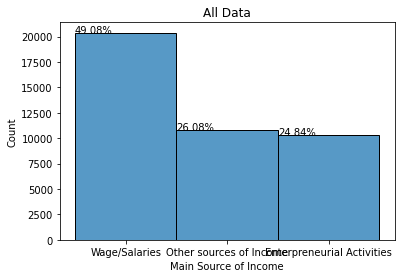

In [20]:
# Data Visualization
def histBarWithPercentage(pysparkDf, category, title):
    statsdata_pandas = pysparkDf.toPandas()
    ax = sns.histplot (data=statsdata_pandas, x=category)
    total = statsdata_pandas[category].count()
    for p in ax.patches:
        txt = str((p.get_height()/total*100).round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
    plt.title(title)
    plt.show()
    
histBarWithPercentage(statsdata, "Main Source of Income", "All Data")

*** Attribute: Main Source of Income, comparing the 2 datasets ***


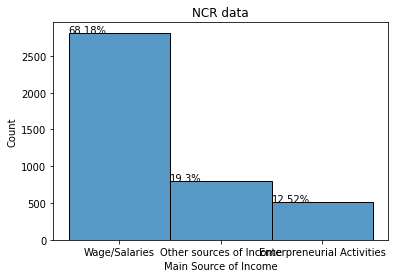

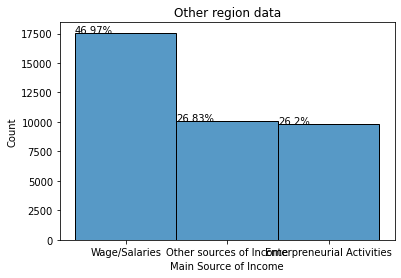

In [21]:
print("*** Attribute: Main Source of Income, comparing the 2 datasets ***")
histBarWithPercentage(df1, "Main Source of Income", "NCR data")
histBarWithPercentage(df2, "Main Source of Income", "Other region data")

*** Total Income by Region ***


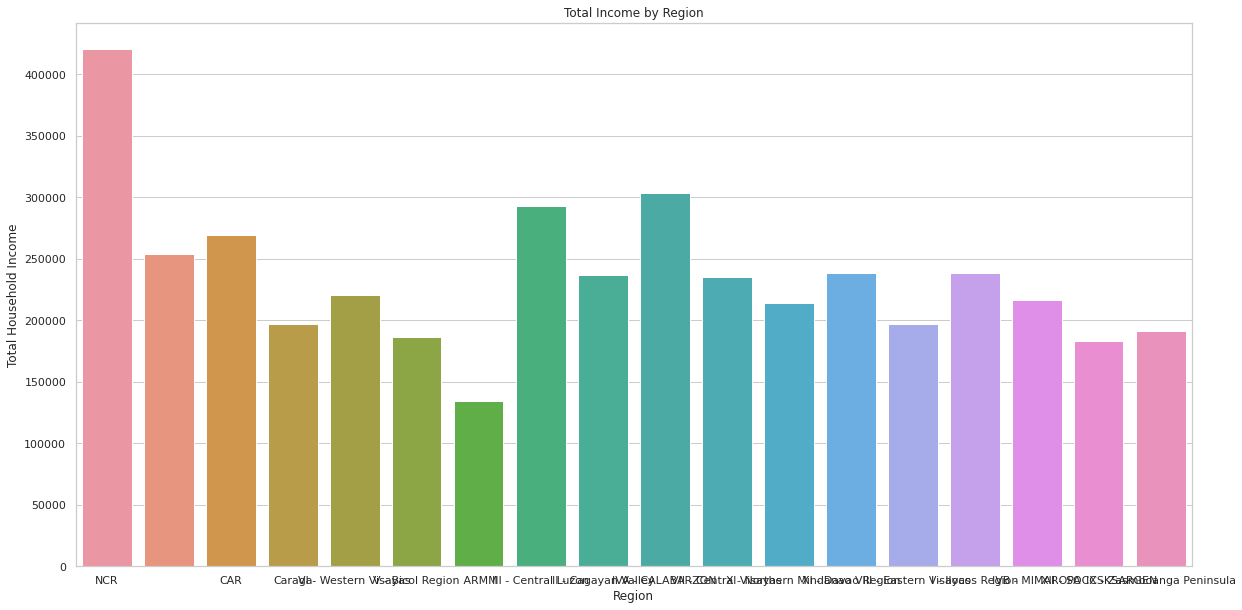

In [22]:
print("*** Total Income by Region ***")
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", color_codes=False)
sns.barplot(data=statsdata.toPandas(), y="Total Household Income", x="Region", ci=None)
plt.title("Total Income by Region")
plt.show()

*** Medical Care Expenditure by Region ***


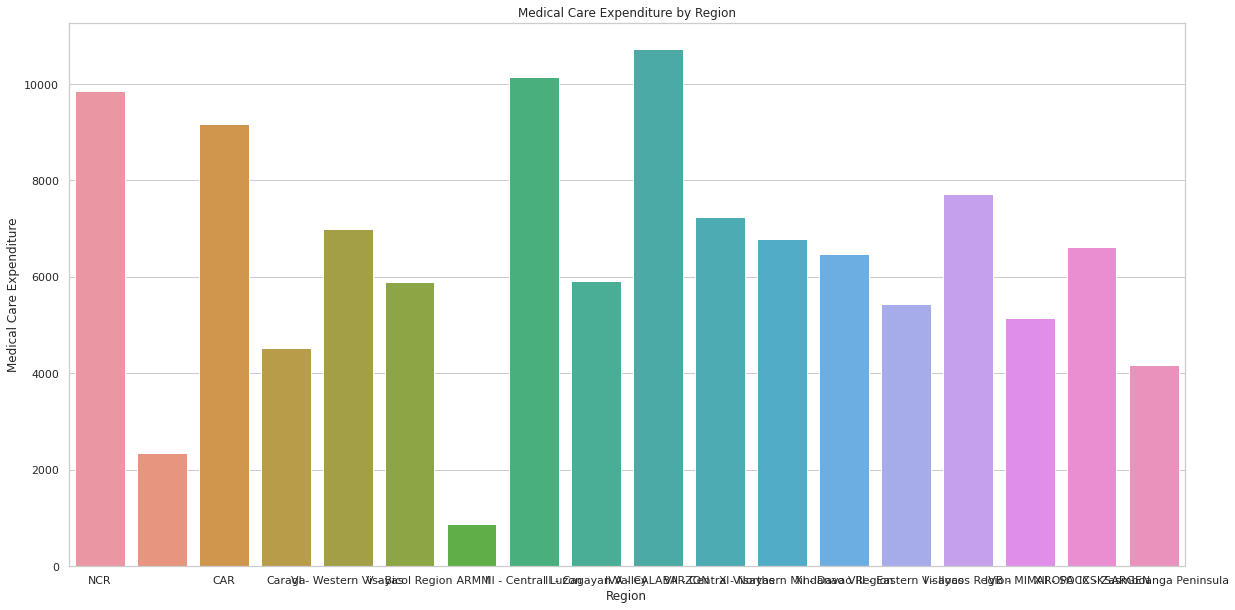

In [23]:
print("*** Medical Care Expenditure by Region ***")
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", color_codes=False)
sns.barplot(data=statsdata.toPandas(), y="Medical Care Expenditure", x="Region", ci=None)
plt.title("Medical Care Expenditure by Region")
plt.show()

In [24]:
def showGraphs(statsdata):
    print("*** Medical Care Expenditure ***")
    print("Mean:",'{:,.2f}'.format(statsdata["Medical Care Expenditure"].mean()))
    print("Median:",'{:,.2f}'.format(statsdata["Medical Care Expenditure"].median()))
    print("Mode:",statsdata["Medical Care Expenditure"].mode())
    print("Max:",'{:,.2f}'.format(statsdata["Medical Care Expenditure"].max()))
    kde = stats.gaussian_kde(statsdata["Medical Care Expenditure"])
    print(kde)
    
    print("*** Plot for Medical Care Expenditure ***")
    plt.figure(figsize=(20,10))
    plt.hist(statsdata["Medical Care Expenditure"], color='blue', bins=20)
    plt.title("Histogram of Annual Medical Care Expenditure")
    plt.xlabel("Medical Care Spend in Philippine Pesos (in millions)")
    plt.ylabel("Count")    
    plt.show()
    
    # illustrate bins distribution for this field
    counts, bin_edges = np.histogram(statsdata["Medical Care Expenditure"], bins=20)
    print("Bins and Edges for Medical Care Expenditure:")
    for idx in range(len(bin_edges)):
        if(idx+1 < len(bin_edges)):
            print(bin_edges[idx], " - ", bin_edges[idx+1],":",counts[idx],"counts")
            
    print("Histogram Plot with KDE")
    plt.figure(figsize=(20,10))
    sns.histplot(data = statsdata
                ,x = 'Medical Care Expenditure'
                ,color = 'navy'
                ,alpha = 1
                ,bins = 20
                ,kde=True)
    plt.show()

    print("*** Attribute: Household Head Gender ***")
    plt.figure(figsize=(100,50))
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    sns.set_theme(style="whitegrid")
    # create a countplot
    sns.countplot(x=statsdata["Household Head Sex"], ax=axes[0])
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=statsdata, y="Medical Care Expenditure", x="Household Head Sex", ax=axes[1])
    plt.show()
    
    print("*** Attribute: Household Head Marital Status ***")
    plt.figure(figsize=(100,50))
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    sns.set_theme(style="whitegrid")
    # create a countplot
    sns.countplot(x=statsdata["Household Head Marital Status"], ax=axes[0])
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=statsdata, y="Medical Care Expenditure", x="Household Head Marital Status", ax=axes[1])
    plt.show()

    print("*** KDE Plot of Household Income vs Medical Care Expenditure ***")
    plt.figure(figsize=(20,10))
    sns.kdeplot(x=statsdata["Total Household Income"], y=statsdata["Medical Care Expenditure"])
    plt.show()

*** Medical Care Expenditure ***
Mean: 7,160.23
Median: 1,125.00
Mode: 0    0
Name: Medical Care Expenditure, dtype: int32
Max: 1,049,275.00
*** Plot for Medical Care Expenditure ***


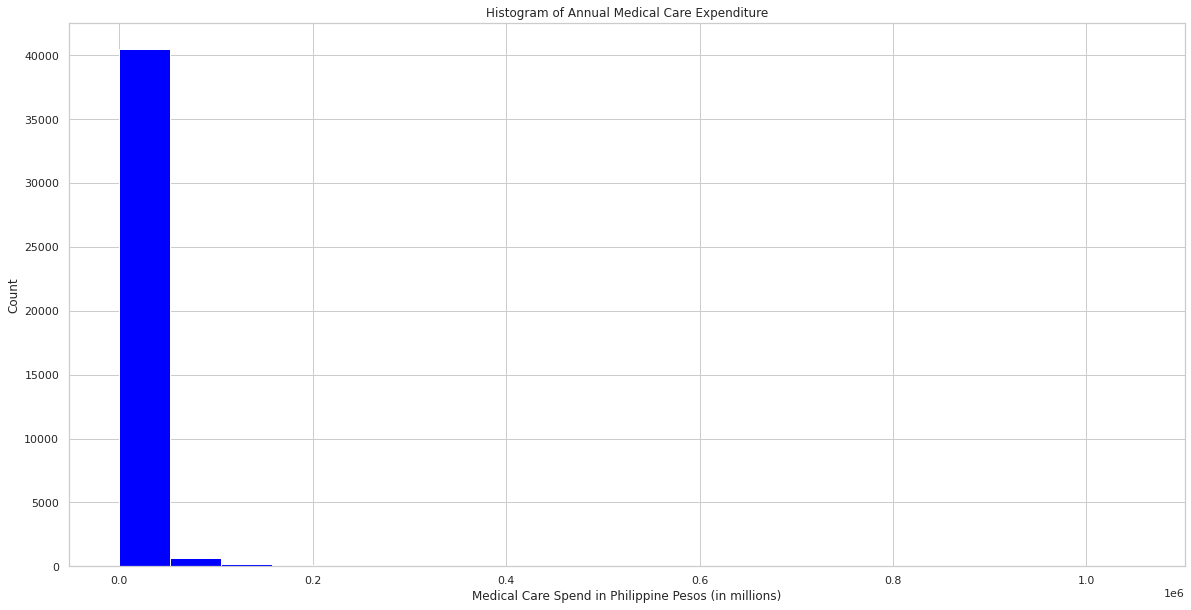

Bins and Edges for Medical Care Expenditure:
0.0  -  52463.75 : 40517 counts
52463.75  -  104927.5 : 672 counts
104927.5  -  157391.25 : 168 counts
157391.25  -  209855.0 : 77 counts
209855.0  -  262318.75 : 32 counts
262318.75  -  314782.5 : 19 counts
314782.5  -  367246.25 : 14 counts
367246.25  -  419710.0 : 13 counts
419710.0  -  472173.75 : 8 counts
472173.75  -  524637.5 : 2 counts
524637.5  -  577101.25 : 6 counts
577101.25  -  629565.0 : 6 counts
629565.0  -  682028.75 : 2 counts
682028.75  -  734492.5 : 1 counts
734492.5  -  786956.25 : 3 counts
786956.25  -  839420.0 : 0 counts
839420.0  -  891883.75 : 0 counts
891883.75  -  944347.5 : 1 counts
944347.5  -  996811.25 : 1 counts
996811.25  -  1049275.0 : 2 counts
Histogram Plot with KDE


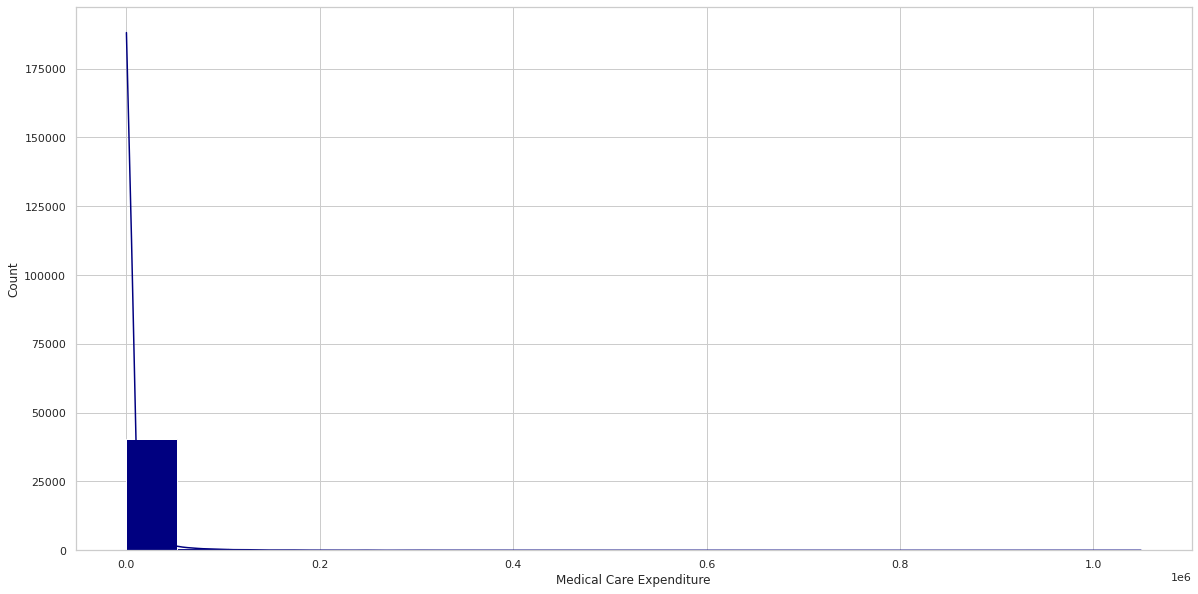

*** Attribute: Household Head Gender ***


<Figure size 7200x3600 with 0 Axes>

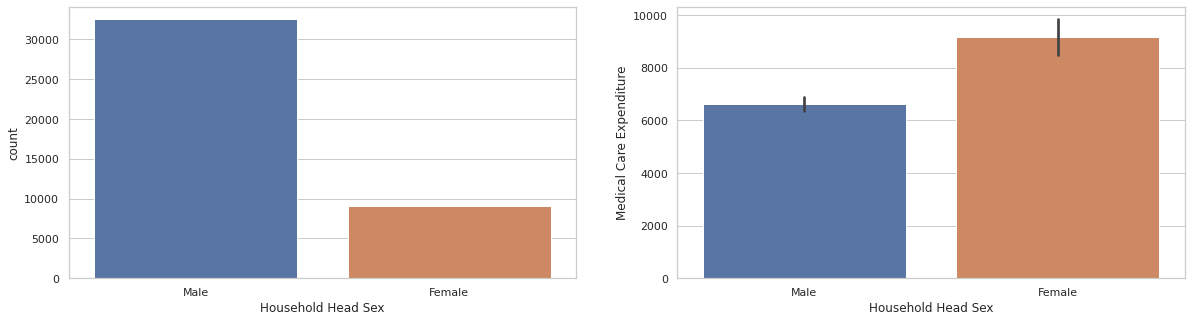

*** Attribute: Household Head Marital Status ***


<Figure size 7200x3600 with 0 Axes>

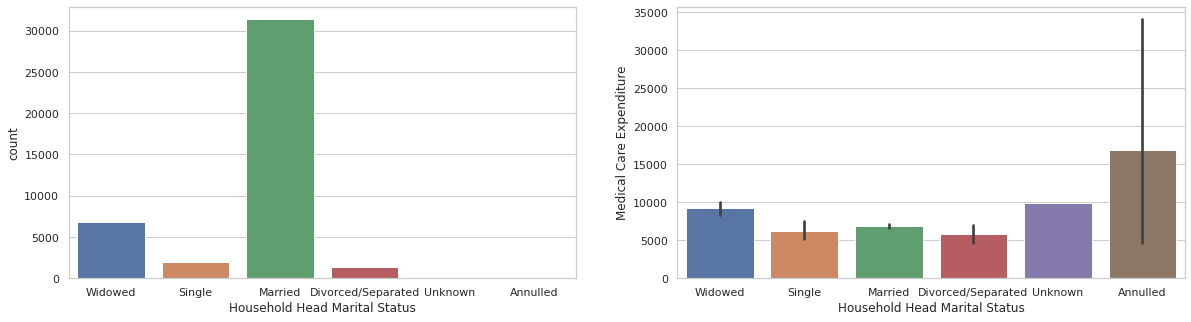

*** KDE Plot of Household Income vs Medical Care Expenditure ***


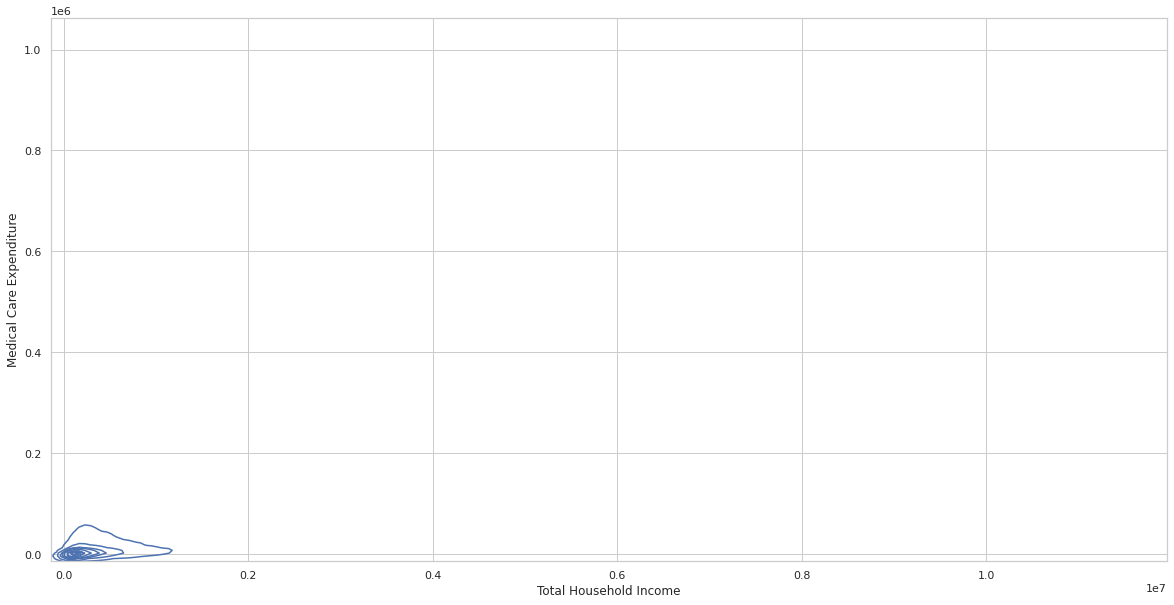

In [25]:
showGraphs(statsdata.toPandas())

In [26]:
statsdata.describe(['Medical Care Expenditure']).show()

+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   41544|
|   mean|       7160.230935875216|
| stddev|      26902.002274617334|
|    min|                       0|
|    max|                 1049275|
+-------+------------------------+



In [27]:
statsdata.select("Medical Care Expenditure").summary().show()

+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   41544|
|   mean|       7160.230935875216|
| stddev|      26902.002274617334|
|    min|                       0|
|    25%|                     300|
|    50%|                    1125|
|    75%|                    4680|
|    max|                 1049275|
+-------+------------------------+



In [28]:
print("National Capital Region - Medical Care Expenditures")
df1.select("Medical Care Expenditure").summary().show()
print("All other regions - Medical Care Expenditures")
df2.select("Medical Care Expenditure").summary().show()

National Capital Region - Medical Care Expenditures
+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                    4130|
|   mean|       9862.722276029055|
| stddev|      27735.123132199347|
|    min|                       0|
|    25%|                     867|
|    50%|                    2705|
|    75%|                    7831|
|    max|                  713640|
+-------+------------------------+

All other regions - Medical Care Expenditures
+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   37414|
|   mean|       6861.912412465922|
| stddev|      26792.129682227747|
|    min|                       0|
|    25%|                     279|
|    50%|                    1010|
|    75%|                    4248|
|    max|                 1049275|
+-------+------------------------+



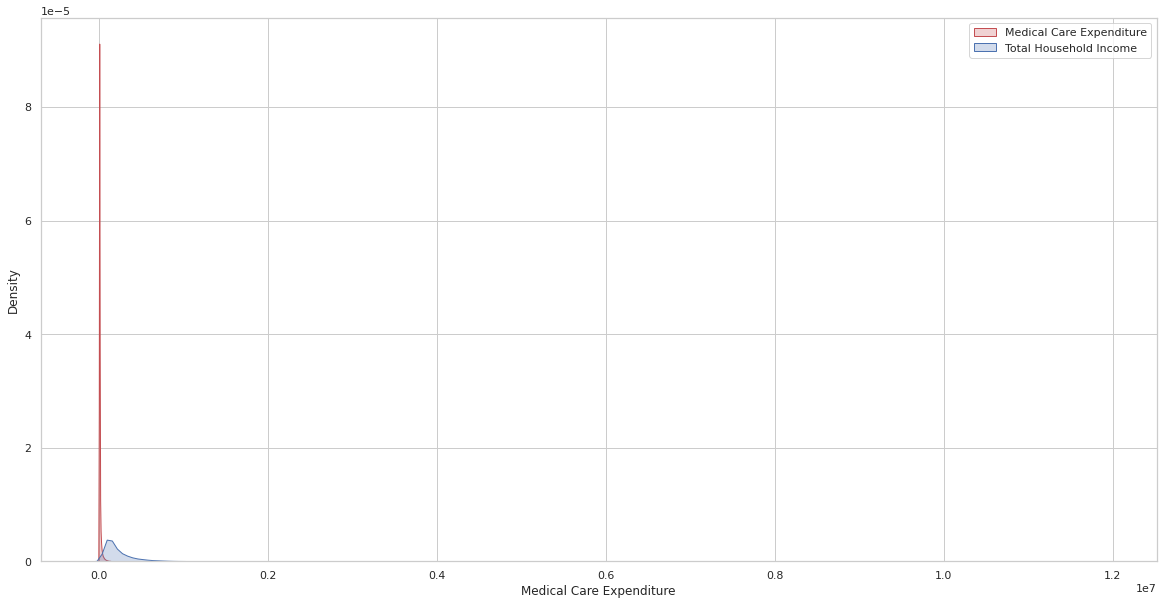

In [29]:
def showMedicalvsIncomeGraph():
    print("*** Medical Care Expenditure vs Total Household Income ***")
    plt.figure(figsize=(20,10))
    sns.set(style="whitegrid", color_codes=False)
    sns.barplot(data=statsdata.toPandas(), y="Medical Care Expenditure", x="Total Household Income", ci=None)
    plt.title("Total Household Income vs Medical Care Expenditure")
    plt.show()

def showAnotherGraph(statsdata):
    # plotting both distibutions on the same figure
    plt.figure(figsize=(20,10))
    fig = sns.kdeplot(statsdata['Medical Care Expenditure'], shade=True, color="r",label="Medical Care Expenditure")
    fig = sns.kdeplot(statsdata['Total Household Income'], shade=True, color="b",label="Total Household Income")
    plt.legend()
    plt.show()

showAnotherGraph(statsdata.toPandas())

In [30]:
def showGraphsForData(statsdata_NCR, statsdata_theRest):
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    plt.figure(figsize=(20,10))
    sns.histplot(data = statsdata_NCR
            ,x = 'Medical Care Expenditure'
            ,color = 'navy'
            ,alpha = 1
            ,bins = 20
            ,kde=True
            ,ax=axes[0]).set(title='NCR')
    sns.histplot(data = statsdata_theRest
            ,x = 'Medical Care Expenditure'
            ,color = 'navy'
            ,alpha = 1
            ,bins = 20
            ,kde=True
            ,ax=axes[1]).set(title='Non-NCR Regions')
    plt.show()
    
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    sns.set(style="whitegrid", color_codes=False)
    sns.boxplot(data=statsdata_NCR, y="Total Household Income", x="Main Source of Income", ax=axes[0]).set(title='NCR')
    sns.set(style="whitegrid", color_codes=False)
    sns.boxplot(data=statsdata_theRest, y="Total Household Income", x="Main Source of Income", ax=axes[1]).set(title='Non-NCR Regions')
    plt.show()

    print("*** Attribute: Household Head Gender - NCR ***")
    plt.figure(figsize=(100,50))
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    sns.set_theme(style="whitegrid")
    # create a countplot
    sns.countplot(x=statsdata_NCR["Household Head Sex"], ax=axes[0])
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=statsdata_NCR, y="Medical Care Expenditure", x="Household Head Sex", ax=axes[1])
    plt.show()
    
    print("*** Attribute: Household Head Gender - Other Regions ***")
    plt.figure(figsize=(100,50))
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    sns.set_theme(style="whitegrid")
    # create a countplot
    sns.countplot(x=statsdata_theRest["Household Head Sex"], ax=axes[0])
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=statsdata_theRest, y="Medical Care Expenditure", x="Household Head Sex", ax=axes[1])
    plt.show()
    
    print("*** Attribute: Household Head Marital Status - NCR ***")
    plt.figure(figsize=(100,50))
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    sns.set_theme(style="whitegrid")
    # create a countplot
    sns.countplot(x=statsdata_NCR["Household Head Marital Status"], ax=axes[0])
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=statsdata_NCR, y="Medical Care Expenditure", x="Household Head Marital Status", ax=axes[1])
    plt.show()
    
    print("*** Attribute: Household Head Marital Status - Other Regions ***")
    plt.figure(figsize=(100,50))
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    sns.set_theme(style="whitegrid")
    # create a countplot
    sns.countplot(x=statsdata_theRest["Household Head Marital Status"], ax=axes[0])
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=statsdata_theRest, y="Medical Care Expenditure", x="Household Head Marital Status", ax=axes[1])
    plt.show()

Comparison between the 2 subsets of data sources:


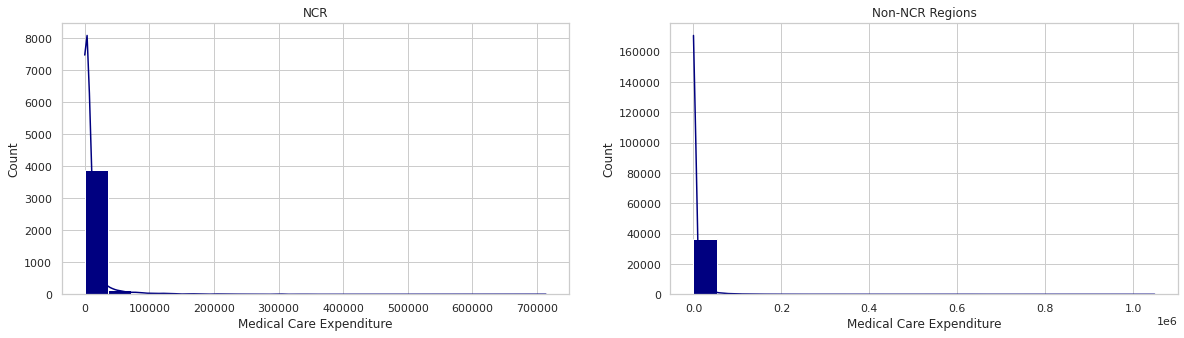

<Figure size 1440x720 with 0 Axes>

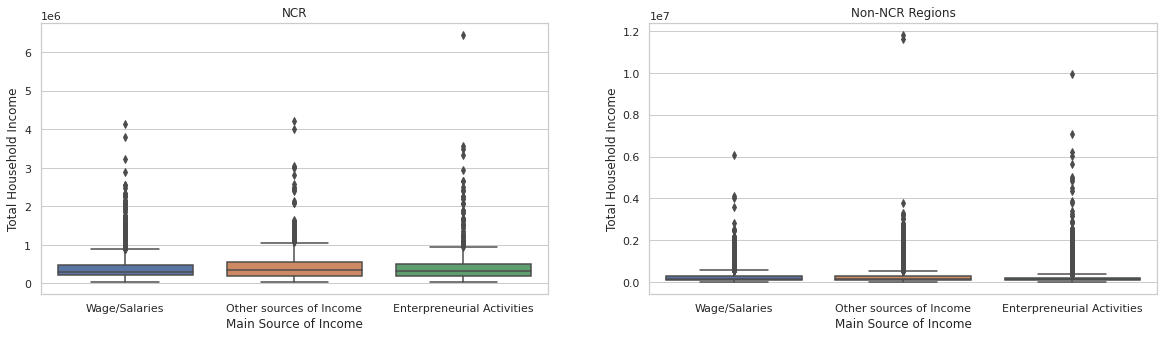

*** Attribute: Household Head Gender - NCR ***


<Figure size 7200x3600 with 0 Axes>

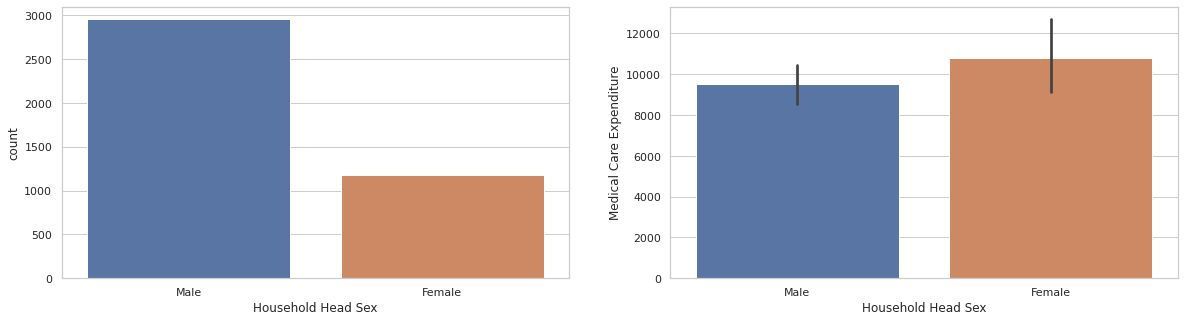

*** Attribute: Household Head Gender - Other Regions ***


<Figure size 7200x3600 with 0 Axes>

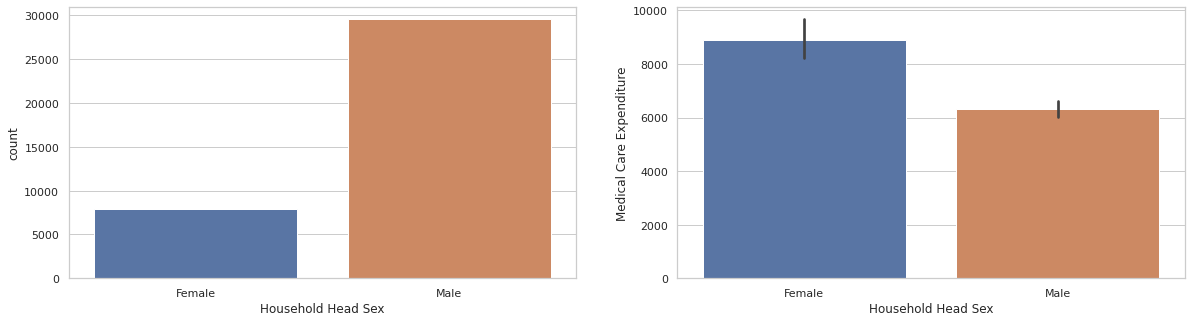

*** Attribute: Household Head Marital Status - NCR ***


<Figure size 7200x3600 with 0 Axes>

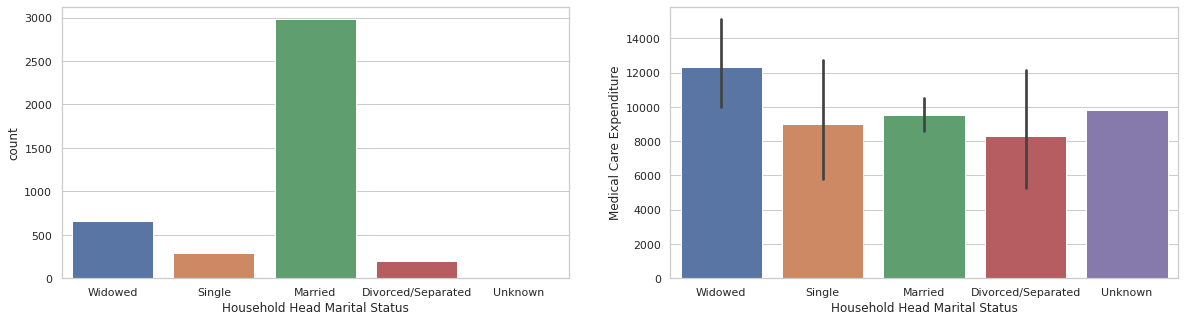

*** Attribute: Household Head Marital Status - Other Regions ***


<Figure size 7200x3600 with 0 Axes>

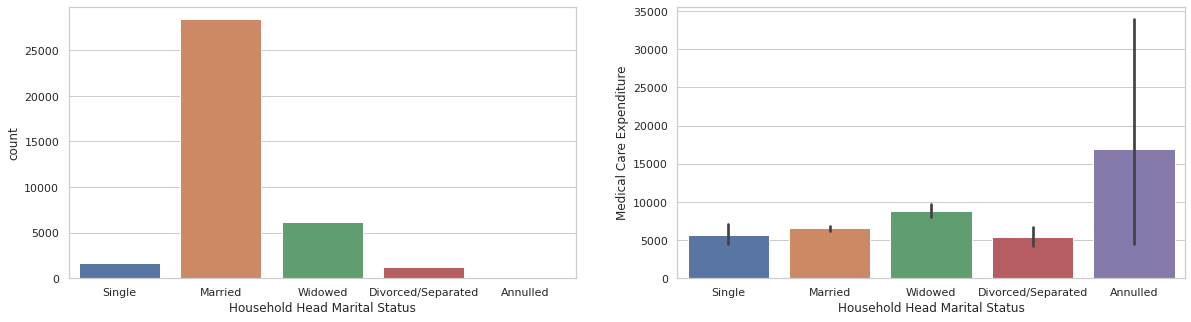

In [31]:
print("Comparison between the 2 subsets of data sources:")
showGraphsForData(df1.toPandas(), df2.toPandas())

In [32]:
cols = ['Medical Care Expenditure', 'Total Household Income','Total Food Expenditure', 'Restaurant and hotels Expenditure']
statsdata.select(cols).summary().show()

+-------+------------------------+----------------------+----------------------+---------------------------------+
|summary|Medical Care Expenditure|Total Household Income|Total Food Expenditure|Restaurant and hotels Expenditure|
+-------+------------------------+----------------------+----------------------+---------------------------------+
|  count|                   41544|                 41544|                 41544|                            41544|
|   mean|       7160.230935875216|    247555.58480165608|     85099.15819372232|               15436.566074523396|
| stddev|      26902.002274617334|     286880.5226527398|     51637.94768239425|                23705.19592934714|
|    min|                       0|                 11285|                  2947|                                0|
|    25%|                     300|                104888|                 51014|                             1930|
|    50%|                    1125|                164070|                 72977|

### More Data Manipulation

Are there null values? True 15072


GridSpec(6, 6)

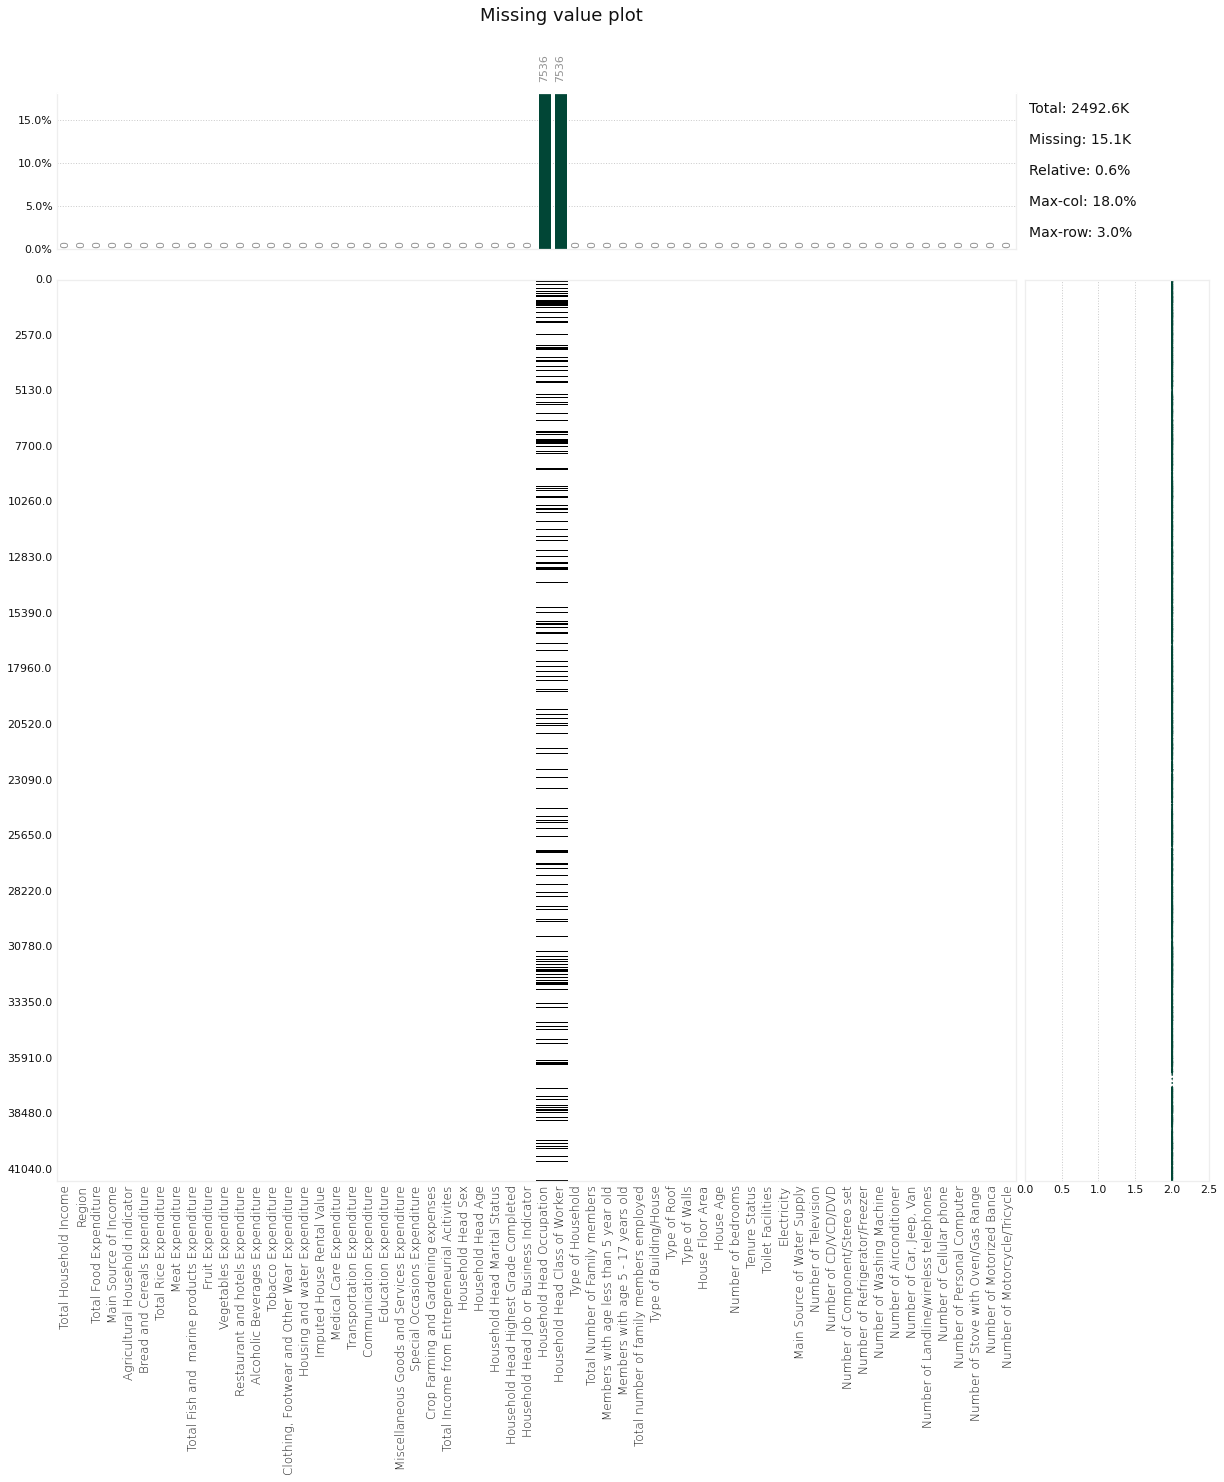

In [33]:
# check null values
print("Are there null values?", statsdata.toPandas().isnull().values.any(), statsdata.toPandas().isnull().sum().sum())
klib.missingval_plot(statsdata.toPandas())

<AxesSubplot:>

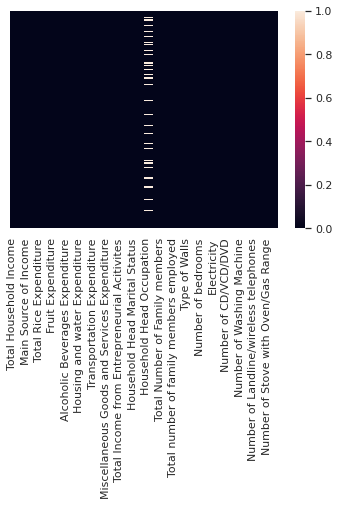

In [34]:
sns.heatmap(statsdata.toPandas().isnull(), yticklabels=False)

In [35]:
from pyspark.sql.functions import col,isnan,when,count
# check for NULL or empty cells
statsdata2 = statsdata.select([count(when( \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in statsdata.columns])
# show all columns - does not display nicely in notebook screen
statsdata2.show()
# we show the specific columns that has results
statsdata2.select('Household Head Occupation','Household Head Class of Worker').show()

+----------------------+------+----------------------+---------------------+--------------------------------+-----------------------------+----------------------+----------------+-------------------------------------------+-----------------+----------------------+---------------------------------+-------------------------------+-------------------+---------------------------------------------+-----------------------------+--------------------------+------------------------+--------------------------+-------------------------+---------------------+--------------------------------------------+-----------------------------+-----------------------------------+--------------------------------------------+------------------+------------------+-----------------------------+--------------------------------------+----------------------------------------+-------------------------+------------------------------+-----------------+------------------------------+-------------------------------------

In [36]:
# this column also has "None" but is actually part of the response data. 
# Meaning for "None", there are no toilet facilities in this household
statsdata.select('Toilet Facilities').distinct().collect()

[Row(Toilet Facilities='Closed pit'),
 Row(Toilet Facilities='Water-sealed, other depository, used exclusively by household'),
 Row(Toilet Facilities='None'),
 Row(Toilet Facilities='Open pit'),
 Row(Toilet Facilities='Water-sealed, other depository, shared with other household'),
 Row(Toilet Facilities='Water-sealed, sewer septic tank, shared with other household'),
 Row(Toilet Facilities='Water-sealed, sewer septic tank, used exclusively by household'),
 Row(Toilet Facilities='Others')]

In [37]:
statsdata.groupBy('Toilet Facilities').count().orderBy('count', ascending=False).show()

+--------------------+-----+
|   Toilet Facilities|count|
+--------------------+-----+
|Water-sealed, sew...|29162|
|Water-sealed, sew...| 3694|
|Water-sealed, oth...| 2343|
|          Closed pit| 2273|
|                None| 1580|
|            Open pit| 1189|
|Water-sealed, oth...|  950|
|              Others|  353|
+--------------------+-----+



In [38]:
# checking for "Household Head Class of Worker"
print("Unique values:",statsdata.select('Household Head Class of Worker').distinct().count())
statsdata.select('Household Head Class of Worker').distinct().collect()

Unique values: 8


[Row(Household Head Class of Worker='Worked for private establishment'),
 Row(Household Head Class of Worker=None),
 Row(Household Head Class of Worker='Worked with pay in own family-operated farm or business'),
 Row(Household Head Class of Worker='Worked for private household'),
 Row(Household Head Class of Worker='Self-employed wihout any employee'),
 Row(Household Head Class of Worker='Worked for government/government corporation'),
 Row(Household Head Class of Worker='Employer in own family-operated farm or business'),
 Row(Household Head Class of Worker='Worked without pay in own family-operated farm or business')]

In [39]:
statsdata.groupBy('Household Head Class of Worker').count().orderBy('count', ascending=False).show()

+------------------------------+-----+
|Household Head Class of Worker|count|
+------------------------------+-----+
|          Self-employed wih...|13766|
|          Worked for privat...|13731|
|                          null| 7536|
|          Worked for govern...| 2820|
|          Employer in own f...| 2581|
|          Worked for privat...|  811|
|          Worked without pa...|  285|
|          Worked with pay i...|   14|
+------------------------------+-----+



In [40]:
# checking for "Household Head Class of Worker"
print("Unique values:",statsdata.select('Household Head Occupation').distinct().count())
statsdata.select('Household Head Occupation').distinct().collect()

Unique values: 379


[Row(Household Head Occupation='General managers/managing proprietors in wholesale and retail trade'),
 Row(Household Head Occupation='General managers/managing proprietors in agriculture, hunting, forestry and fishing'),
 Row(Household Head Occupation='Sewers, Embroiderers and related workers'),
 Row(Household Head Occupation='Electrical engineering technicians'),
 Row(Household Head Occupation='Teaching associate professionals'),
 Row(Household Head Occupation='Transport and communications service supervisors n. e. c.'),
 Row(Household Head Occupation='Government administrators (including career executive service officers)'),
 Row(Household Head Occupation='Transport conductors'),
 Row(Household Head Occupation='Other business professionals'),
 Row(Household Head Occupation='Draftsmen'),
 Row(Household Head Occupation='Choreographers and dancers'),
 Row(Household Head Occupation='Other finance and sales associate professionals'),
 Row(Household Head Occupation='Advertising and public

In [41]:
statsdata.groupBy('Household Head Occupation').count().orderBy('count', ascending=False).show()

+-------------------------+-----+
|Household Head Occupation|count|
+-------------------------+-----+
|                     null| 7536|
|     Farmhands and lab...| 3478|
|             Rice farmers| 2849|
|     General managers/...| 2028|
|     General managers/...| 1932|
|             Corn farmers| 1724|
|          Coconut farmers| 1036|
|     Building construc...| 1014|
|     Inland and coasta...| 1011|
|     Carpenters and jo...| 1000|
|     Car, taxi and van...|  824|
|     Protective servic...|  640|
|     Shop salespersons...|  611|
|     Market and sidewa...|  576|
|     General managers/...|  554|
|     General managers/...|  539|
|        Vegetable farmers|  504|
|       Motorcycle drivers|  496|
|     General managers/...|  482|
|     Traditional chief...|  435|
+-------------------------+-----+
only showing top 20 rows



GridSpec(6, 6)

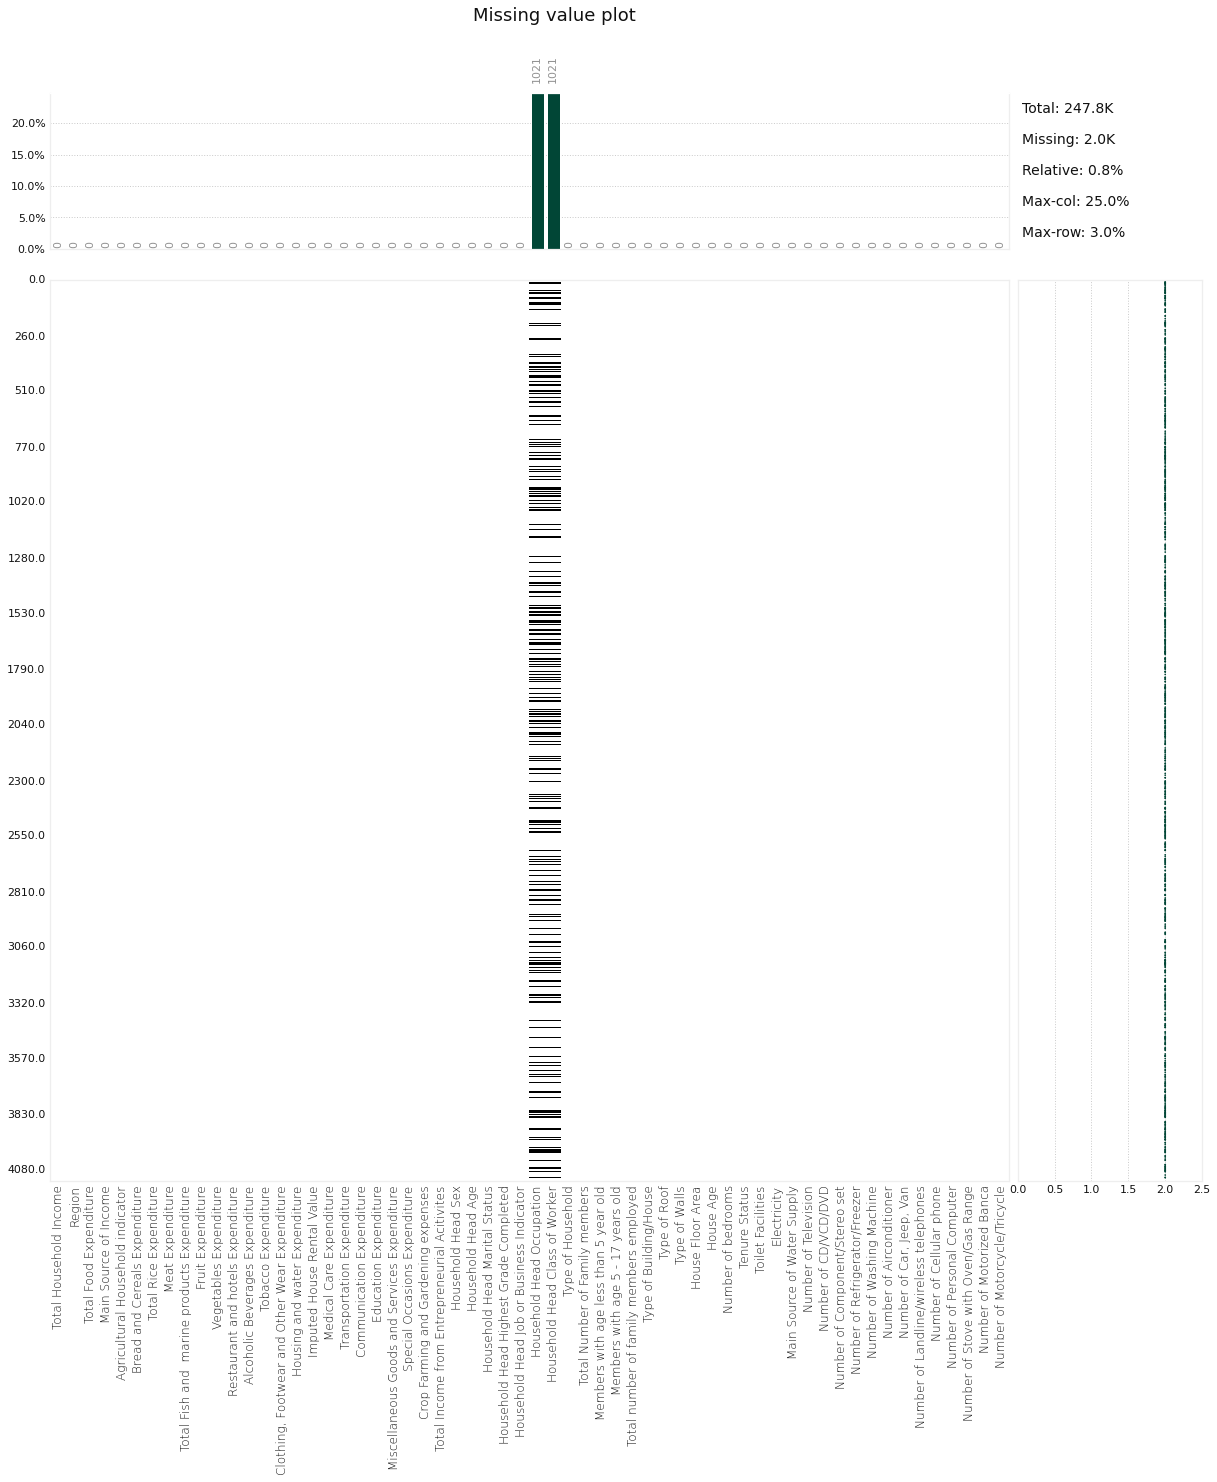

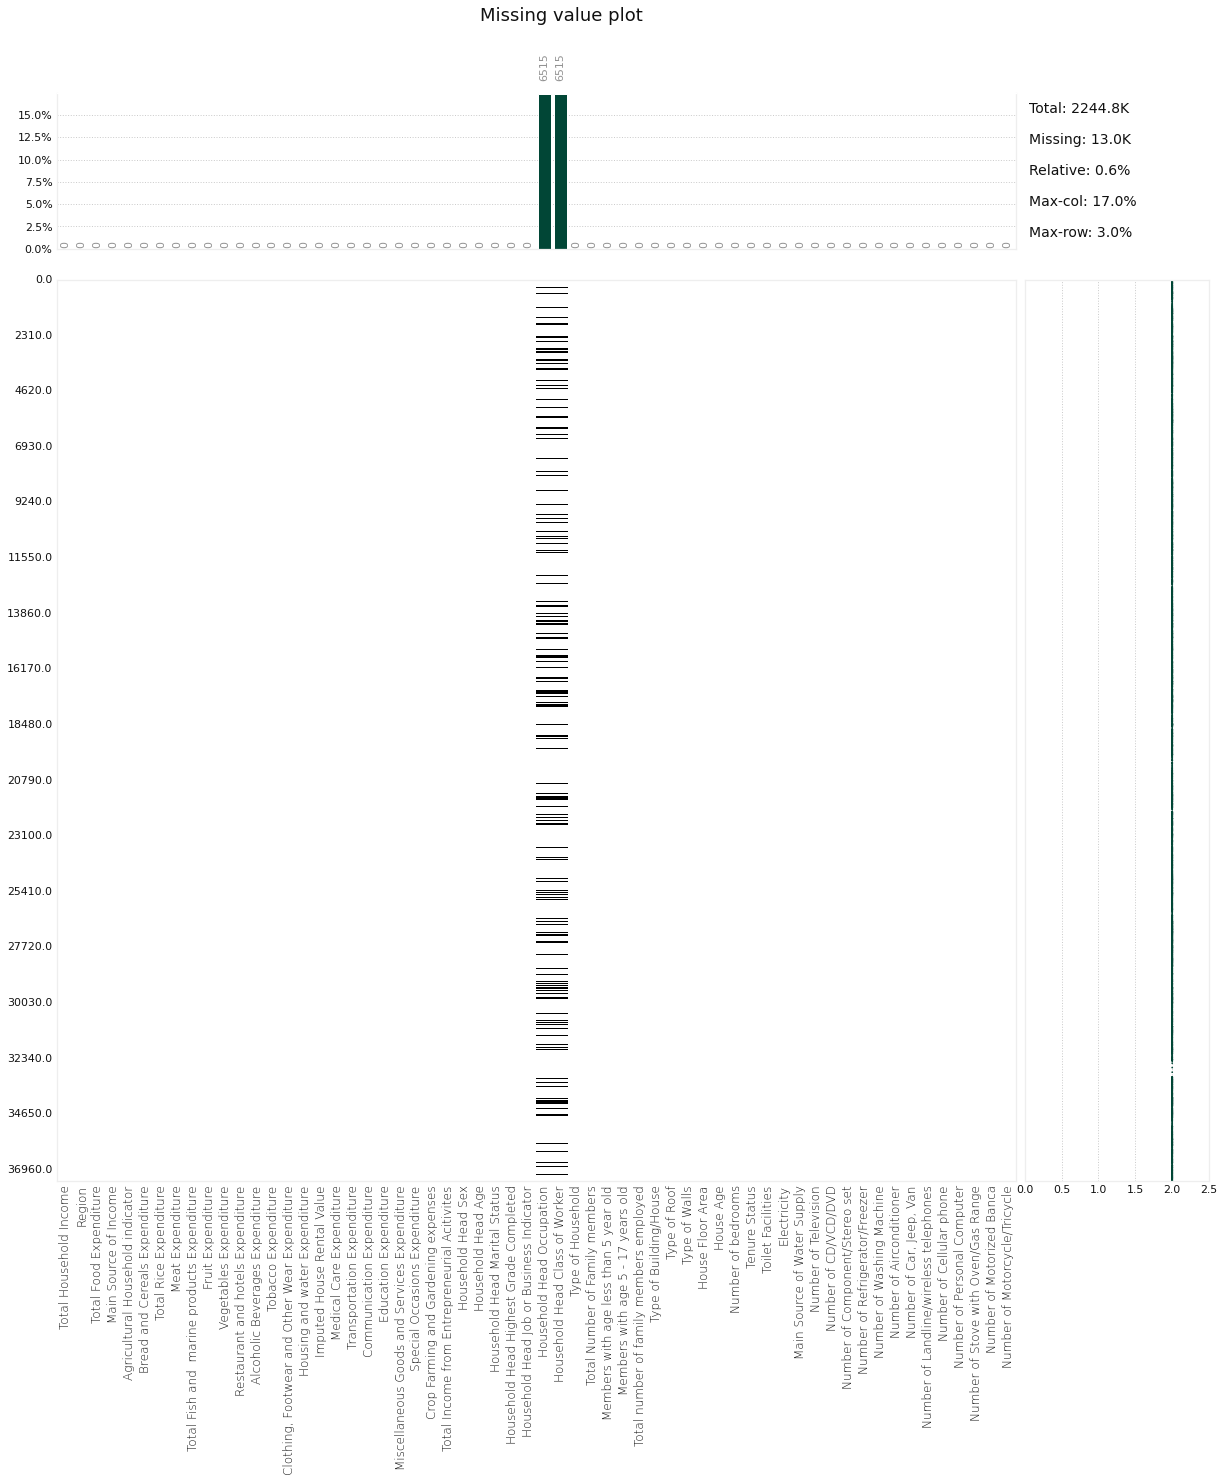

In [42]:
# check for each of the subsets
klib.missingval_plot(df1.toPandas())
klib.missingval_plot(df2.toPandas())

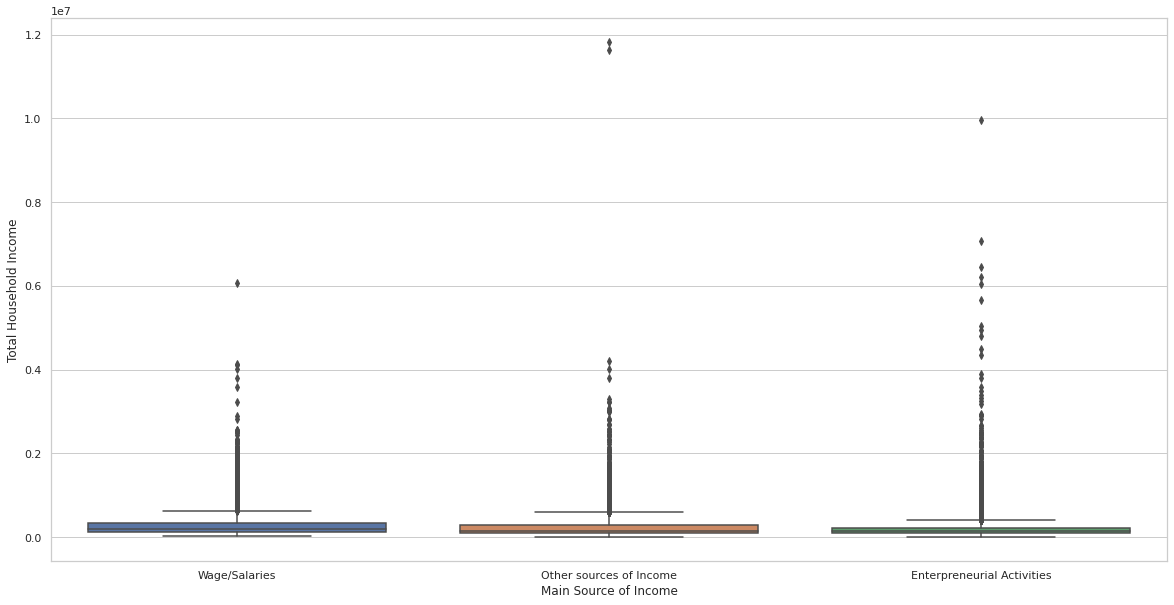

In [43]:
# showcase outliers distribution in some fields
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", color_codes=False)
sns.boxplot(data=statsdata.toPandas(), y="Total Household Income", x="Main Source of Income")
plt.show()

Box Plot for Main Source of Income vs Household Income for NCR (left), and Non-NCR (right)


<Figure size 7200x3600 with 0 Axes>

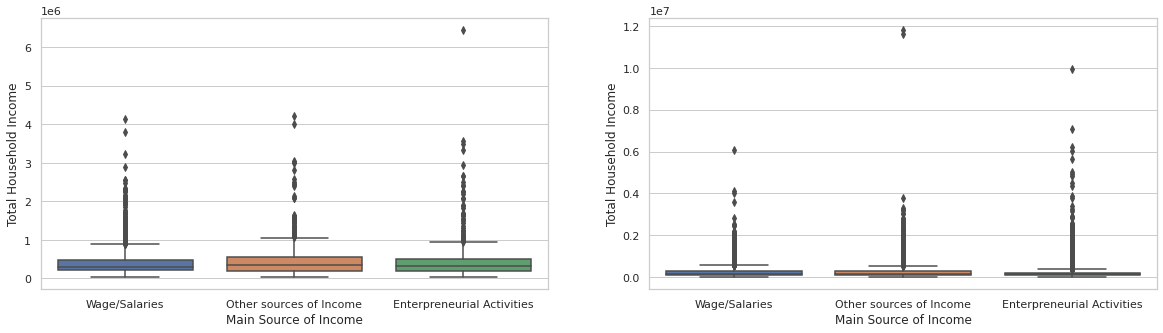

In [44]:
print("Box Plot for Main Source of Income vs Household Income for NCR (left), and Non-NCR (right)")
plt.figure(figsize=(100,50))
fig, axes = plt.subplots(1, 2,figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df1.toPandas(), y="Total Household Income", x="Main Source of Income",ax=axes[0])
sns.boxplot(data=df2.toPandas(), y="Total Household Income", x="Main Source of Income",ax=axes[1])
plt.show()

In [45]:
# check duplicates
pandasDf = statsdata.toPandas()
print("Duplicates: ", len(pandasDf[pandasDf.duplicated()]))

Duplicates:  0


### Data Preparation

In [46]:
print("Original combined dataset:", statsdata.count(), "x", len(statsdata.columns))

Original combined dataset: 41544 x 60


In [47]:
# Drop columns
Columns_To_Remove = ['Region', 'Number of Television', 'Number of CD/VCD/DVD', 'Number of Component/Stereo set', 
                     'Number of Refrigerator/Freezer', 'Number of Washing Machine', 'Number of Airconditioner', 
                     'Number of Car, Jeep, Van', 'Number of Landline/wireless telephones', 'Number of Cellular phone', 
                     'Number of Personal Computer', 'Number of Stove with Oven/Gas Range', 'Number of Motorized Banca', 
                     'Number of Motorcycle/Tricycle']

statsupdate = statsdata.drop(*Columns_To_Remove)

New dimensions: 41544 x 46
Information about Income
3 ['Total Household Income', 'Main Source of Income', 'Total Income from Entrepreneurial Acitivites']

Information about Expenditure Details
19 ['Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']

Information about Household Details
24 ['Agricultural Household indicator', 'Imputed House Rental Value', 'Household Head Sex', 'Household Head Age', 'Household Head Marital Status', 'Household 

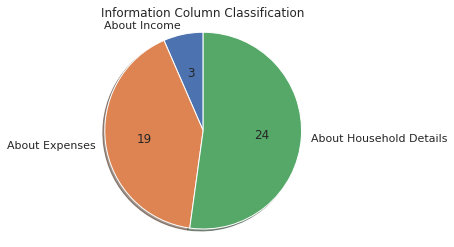

In [48]:
print("New dimensions:",statsupdate.count(), "x", len(statsupdate.columns))
classifyDataColumns(statsupdate)

In [49]:
# Add New Column with Total Expenses
expenses_cols = ['Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']
statsupdate = statsupdate.withColumn('Total Expenditures', sum(statsupdate[col] for col in expenses_cols))
cols = ['Medical Care Expenditure', 'Total Household Income','Total Expenditures']
statsupdate.select(cols).summary().show()
print("New dimensions after adding 1 column:",statsupdate.count(), "x", len(statsupdate.columns))

+-------+------------------------+----------------------+------------------+
|summary|Medical Care Expenditure|Total Household Income|Total Expenditures|
+-------+------------------------+----------------------+------------------+
|  count|                   41544|                 41544|             41544|
|   mean|       7160.230935875216|    247555.58480165608| 281342.1758376661|
| stddev|      26902.002274617334|     286880.5226527398|199811.26434411498|
|    min|                       0|                 11285|             15211|
|    25%|                     300|                104888|            158169|
|    50%|                    1125|                164070|            230673|
|    75%|                    4680|                291081|            343725|
|    max|                 1049275|              11815988|           5085514|
+-------+------------------------+----------------------+------------------+

New dimensions after adding 1 column: 41544 x 47


In [50]:
# Drop the other expenses columns, except Medical Care Expenditure
expenses_cols.remove('Medical Care Expenditure')
statsupdate = statsupdate.drop(*expenses_cols)
print("Updated dimensions after removing",len(expenses_cols),"columns:",statsupdate.count(), "x", len(statsupdate.columns))

Updated dimensions after removing 18 columns: 41544 x 29


Information about Income
3 ['Total Household Income', 'Main Source of Income', 'Total Income from Entrepreneurial Acitivites']

Information about Expenditure Details
2 ['Medical Care Expenditure', 'Total Expenditures']

Information about Household Details
24 ['Agricultural Household indicator', 'Imputed House Rental Value', 'Household Head Sex', 'Household Head Age', 'Household Head Marital Status', 'Household Head Highest Grade Completed', 'Household Head Job or Business Indicator', 'Household Head Occupation', 'Household Head Class of Worker', 'Type of Household', 'Total Number of Family members', 'Members with age less than 5 year old', 'Members with age 5 - 17 years old', 'Total number of family members employed', 'Type of Building/House', 'Type of Roof', 'Type of Walls', 'House Floor Area', 'House Age', 'Number of bedrooms', 'Tenure Status', 'Toilet Facilities', 'Electricity', 'Main Source of Water Supply']



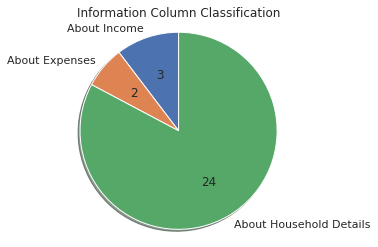

In [51]:
classifyDataColumns(statsupdate)

In [52]:
statsupdate.printSchema()

root
 |-- Total Household Income: integer (nullable = true)
 |-- Main Source of Income: string (nullable = true)
 |-- Agricultural Household indicator: integer (nullable = true)
 |-- Imputed House Rental Value: integer (nullable = true)
 |-- Medical Care Expenditure: integer (nullable = true)
 |-- Total Income from Entrepreneurial Acitivites: integer (nullable = true)
 |-- Household Head Sex: string (nullable = true)
 |-- Household Head Age: integer (nullable = true)
 |-- Household Head Marital Status: string (nullable = true)
 |-- Household Head Highest Grade Completed: string (nullable = true)
 |-- Household Head Job or Business Indicator: string (nullable = true)
 |-- Household Head Occupation: string (nullable = true)
 |-- Household Head Class of Worker: string (nullable = true)
 |-- Type of Household: string (nullable = true)
 |-- Total Number of Family members: integer (nullable = true)
 |-- Members with age less than 5 year old: integer (nullable = true)
 |-- Members with age 5 

In [53]:
# update those with missing values to "Not Specified"
statsupdate = statsupdate.na.fill('Not Specified')

In [54]:
statsupdate.groupBy('Household Head Class of Worker').count().orderBy('count', ascending=False).show()

+------------------------------+-----+
|Household Head Class of Worker|count|
+------------------------------+-----+
|          Self-employed wih...|13766|
|          Worked for privat...|13731|
|                 Not Specified| 7536|
|          Worked for govern...| 2820|
|          Employer in own f...| 2581|
|          Worked for privat...|  811|
|          Worked without pa...|  285|
|          Worked with pay i...|   14|
+------------------------------+-----+



In [55]:
statsupdate.groupBy('Household Head Occupation').count().orderBy('count', ascending=False).show()

+-------------------------+-----+
|Household Head Occupation|count|
+-------------------------+-----+
|            Not Specified| 7536|
|     Farmhands and lab...| 3478|
|             Rice farmers| 2849|
|     General managers/...| 2028|
|     General managers/...| 1932|
|             Corn farmers| 1724|
|          Coconut farmers| 1036|
|     Building construc...| 1014|
|     Inland and coasta...| 1011|
|     Carpenters and jo...| 1000|
|     Car, taxi and van...|  824|
|     Protective servic...|  640|
|     Shop salespersons...|  611|
|     Market and sidewa...|  576|
|     General managers/...|  554|
|     General managers/...|  539|
|        Vegetable farmers|  504|
|       Motorcycle drivers|  496|
|     General managers/...|  482|
|     Traditional chief...|  435|
+-------------------------+-----+
only showing top 20 rows



In [56]:
print("Are there null values?", statsupdate.toPandas().isnull().values.any(), statsupdate.toPandas().isnull().sum().sum())

Are there null values? False 0


In [57]:
print("Standard Deviation")
displayCols = ['Medical Care Expenditure', 'Total Household Income']
statsupdate.select([format_number(stddev(c), 2).alias(c) for c in displayCols]).show()

Standard Deviation
+------------------------+----------------------+
|Medical Care Expenditure|Total Household Income|
+------------------------+----------------------+
|               26,902.00|            286,880.52|
+------------------------+----------------------+



In [58]:
df_cleaned = klib.data_cleaning(statsupdate.toPandas())
df_cleaned.shape

Long column names detected (>25 characters). Consider renaming the following columns ['agricultural_household_indicator', 'imputed_house_rental_value', 'total_income_from_entrepreneurial_acitivites', 'household_head_marital_status', 'household_head_highest_grade_completed', 'household_head_job_or_business_indicator', 'household_head_class_of_worker', 'total_number_of_family_members', 'members_with_age_less_than_5_year_old', 'members_with_age_5_17_years_old', 'total_number_of_family_members_employed', 'main_source_of_water_supply'].
Shape of cleaned data: (41544, 29) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 3.82 MB (-56.09%)



(41544, 29)

In [59]:
# calculate upper and lower bounds for outliers, adapted from internet
def calculate_bounds(df):
    bounds = {
        c: dict(
            zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
        )
        for c,d in zip(df.columns, df.dtypes) if d[1] == "int"
    }
    for c in bounds:
        iqr = bounds[c]['q3'] - bounds[c]['q1']
        bounds[c]['min'] = bounds[c]['q1'] - (iqr * 1.5)
        bounds[c]['max'] = bounds[c]['q3'] + (iqr * 1.5)

    return bounds

bounds = calculate_bounds(statsupdate)
print(len(bounds), " numeric columns with possible outliers:", bounds)

15  numeric columns with possible outliers: {'Total Household Income': {'q1': 104895.0, 'q3': 291138.0, 'min': -174469.5, 'max': 570502.5}, 'Agricultural Household indicator': {'q1': 0.0, 'q3': 1.0, 'min': -1.5, 'max': 2.5}, 'Imputed House Rental Value': {'q1': 6000.0, 'q3': 24000.0, 'min': -21000.0, 'max': 51000.0}, 'Medical Care Expenditure': {'q1': 300.0, 'q3': 4680.0, 'min': -6270.0, 'max': 11250.0}, 'Total Income from Entrepreneurial Acitivites': {'q1': 0.0, 'q3': 65965.0, 'min': -98947.5, 'max': 164912.5}, 'Household Head Age': {'q1': 41.0, 'q3': 61.0, 'min': 11.0, 'max': 91.0}, 'Total Number of Family members': {'q1': 3.0, 'q3': 6.0, 'min': -1.5, 'max': 10.5}, 'Members with age less than 5 year old': {'q1': 0.0, 'q3': 1.0, 'min': -1.5, 'max': 2.5}, 'Members with age 5 - 17 years old': {'q1': 0.0, 'q3': 2.0, 'min': -3.0, 'max': 5.0}, 'Total number of family members employed': {'q1': 0.0, 'q3': 2.0, 'min': -3.0, 'max': 5.0}, 'House Floor Area': {'q1': 25.0, 'q3': 70.0, 'min': -42.

In [60]:
# remove outliers for "Total Household Income"
c = "Total Household Income"
newstats = statsupdate.filter(F.col(c).between(bounds[c]['min'], bounds[c]['max']))
newstats.select([format_number(stddev(c), 2).alias(c) for c in displayCols]).show()
newstats.select(displayCols).summary().show()

+------------------------+----------------------+
|Medical Care Expenditure|Total Household Income|
+------------------------+----------------------+
|               16,303.92|            120,551.52|
+------------------------+----------------------+



+-------+------------------------+----------------------+
|summary|Medical Care Expenditure|Total Household Income|
+-------+------------------------+----------------------+
|  count|                   38393|                 38393|
|   mean|      5203.3952803896545|    189885.70455551794|
| stddev|      16303.922847667154|    120551.51645565318|
|    min|                       0|                 11285|
|    25%|                     270|                101148|
|    50%|                     960|                153167|
|    75%|                    3680|                250759|
|    max|                  603695|                570492|
+-------+------------------------+----------------------+



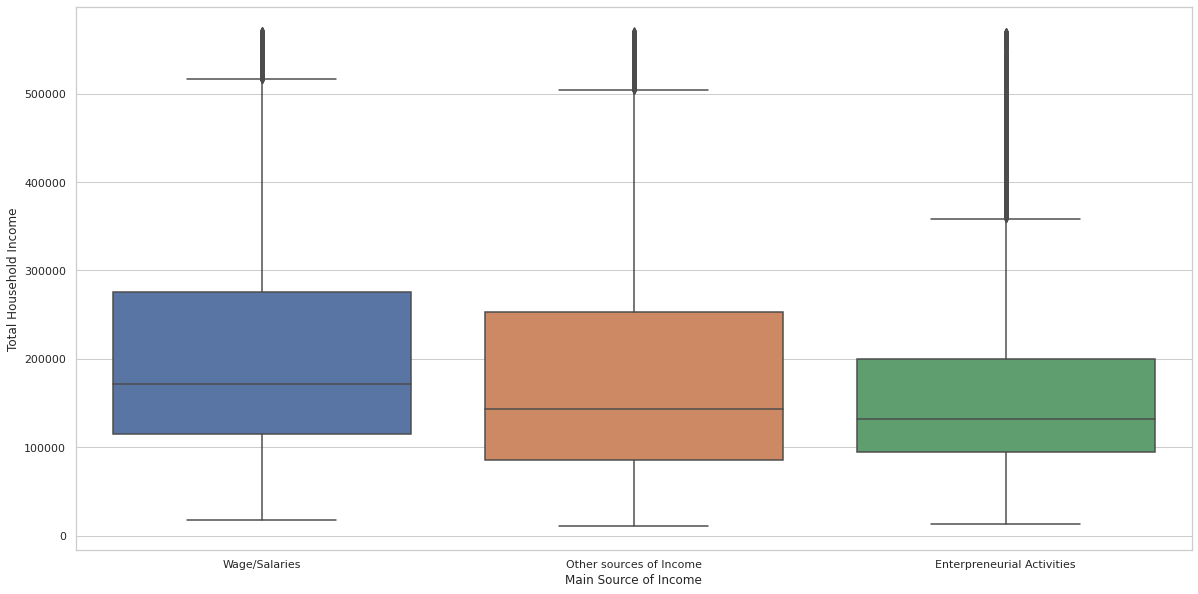

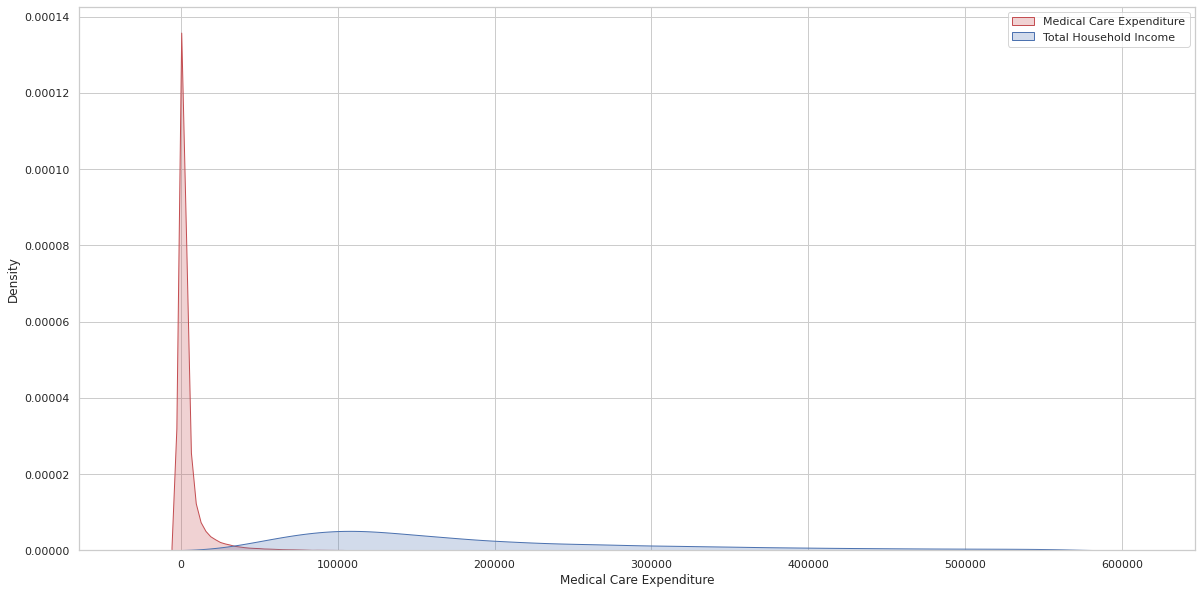

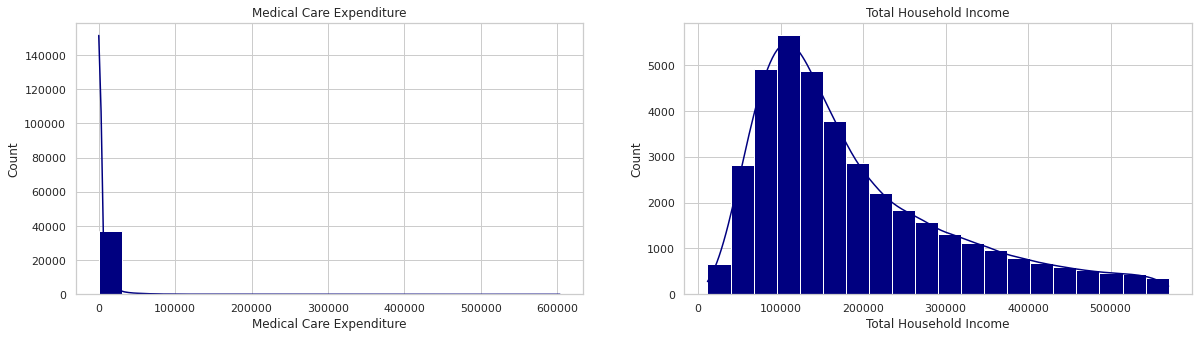

<Figure size 1440x720 with 0 Axes>

In [61]:
# show updated graphs

def showUpdatedDistribution(statsdata):
    # showcase outliers distribution in some fields
    plt.figure(figsize=(20,10))
    sns.set(style="whitegrid", color_codes=False)
    sns.boxplot(data=statsdata, y="Total Household Income", x="Main Source of Income")
    plt.show()
    
    showAnotherGraph(statsdata)
    
    fig, axes = plt.subplots(1, 2,figsize=(20,5))
    plt.figure(figsize=(20,10))
    sns.histplot(data = statsdata
            ,x = 'Medical Care Expenditure'
            ,color = 'navy'
            ,alpha = 1
            ,bins = 20
            ,kde=True
            ,ax=axes[0]).set(title='Medical Care Expenditure')
    sns.histplot(data = statsdata
            ,x = 'Total Household Income'
            ,color = 'navy'
            ,alpha = 1
            ,bins = 20
            ,kde=True
            ,ax=axes[1]).set(title='Total Household Income')
    plt.show()

showUpdatedDistribution(newstats.toPandas())

+------------------------+----------------------+
|Medical Care Expenditure|Total Household Income|
+------------------------+----------------------+
|                2,390.88|            114,272.59|
+------------------------+----------------------+

+-------+------------------------+----------------------+
|summary|Medical Care Expenditure|Total Household Income|
+-------+------------------------+----------------------+
|  count|                   34419|                 34419|
|   mean|       1795.138876783172|    179067.94779046456|
| stddev|       2390.883958965919|    114272.58679221306|
|    min|                       0|                 11285|
|    25%|                     231|                 97390|
|    50%|                     738|                144615|
|    75%|                    2340|                231335|
|    max|                   11250|                570440|
+-------+------------------------+----------------------+



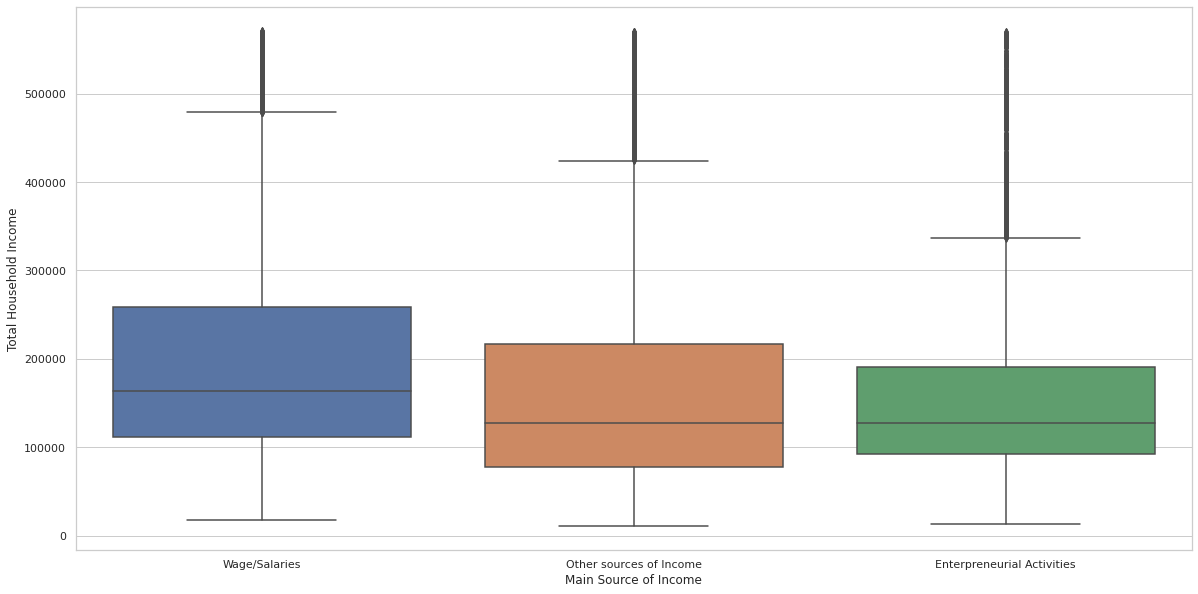

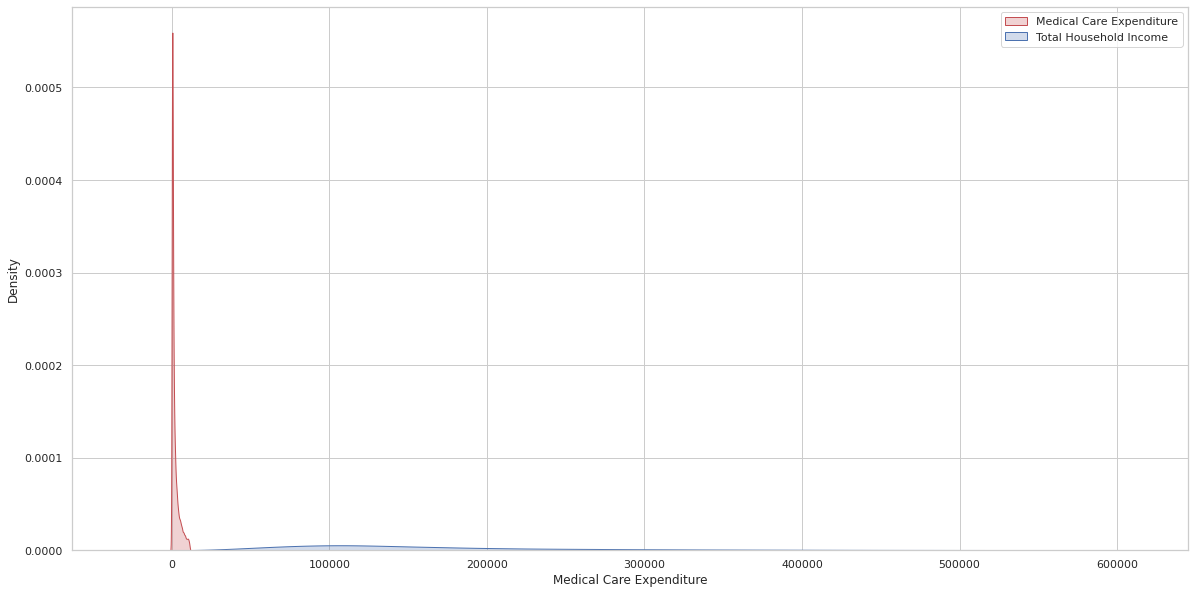

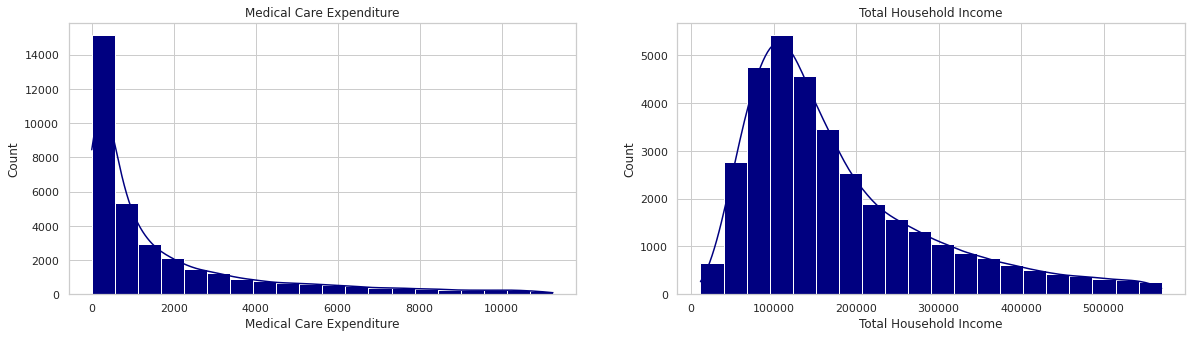

<Figure size 1440x720 with 0 Axes>

In [62]:
# remove outliers for "Medical Care Expenditure"
c = "Medical Care Expenditure"
newstats = newstats.filter(F.col(c).between(bounds[c]['min'], bounds[c]['max']))
newstats.select([format_number(stddev(c), 2).alias(c) for c in displayCols]).show()
newstats.select(displayCols).summary().show()

showUpdatedDistribution(newstats.toPandas())

In [63]:
newstats.printSchema()

root
 |-- Total Household Income: integer (nullable = true)
 |-- Main Source of Income: string (nullable = false)
 |-- Agricultural Household indicator: integer (nullable = true)
 |-- Imputed House Rental Value: integer (nullable = true)
 |-- Medical Care Expenditure: integer (nullable = true)
 |-- Total Income from Entrepreneurial Acitivites: integer (nullable = true)
 |-- Household Head Sex: string (nullable = false)
 |-- Household Head Age: integer (nullable = true)
 |-- Household Head Marital Status: string (nullable = false)
 |-- Household Head Highest Grade Completed: string (nullable = false)
 |-- Household Head Job or Business Indicator: string (nullable = false)
 |-- Household Head Occupation: string (nullable = false)
 |-- Household Head Class of Worker: string (nullable = false)
 |-- Type of Household: string (nullable = false)
 |-- Total Number of Family members: integer (nullable = true)
 |-- Members with age less than 5 year old: integer (nullable = true)
 |-- Members wit

In [64]:
newstats = newstats.withColumnRenamed("Total Income from Entrepreneurial Acitivites", "Total Income from Entrepreneurial Activities")

In [65]:
newstats.printSchema()

root
 |-- Total Household Income: integer (nullable = true)
 |-- Main Source of Income: string (nullable = false)
 |-- Agricultural Household indicator: integer (nullable = true)
 |-- Imputed House Rental Value: integer (nullable = true)
 |-- Medical Care Expenditure: integer (nullable = true)
 |-- Total Income from Entrepreneurial Activities: integer (nullable = true)
 |-- Household Head Sex: string (nullable = false)
 |-- Household Head Age: integer (nullable = true)
 |-- Household Head Marital Status: string (nullable = false)
 |-- Household Head Highest Grade Completed: string (nullable = false)
 |-- Household Head Job or Business Indicator: string (nullable = false)
 |-- Household Head Occupation: string (nullable = false)
 |-- Household Head Class of Worker: string (nullable = false)
 |-- Type of Household: string (nullable = false)
 |-- Total Number of Family members: integer (nullable = true)
 |-- Members with age less than 5 year old: integer (nullable = true)
 |-- Members wit

*** Medical Care Expenditure ***
Mean: 1,795.14
Median: 738.00
Mode: 0    0
Name: Medical Care Expenditure, dtype: int32
Max: 11,250.00
*** Plot for Medical Care Expenditure ***


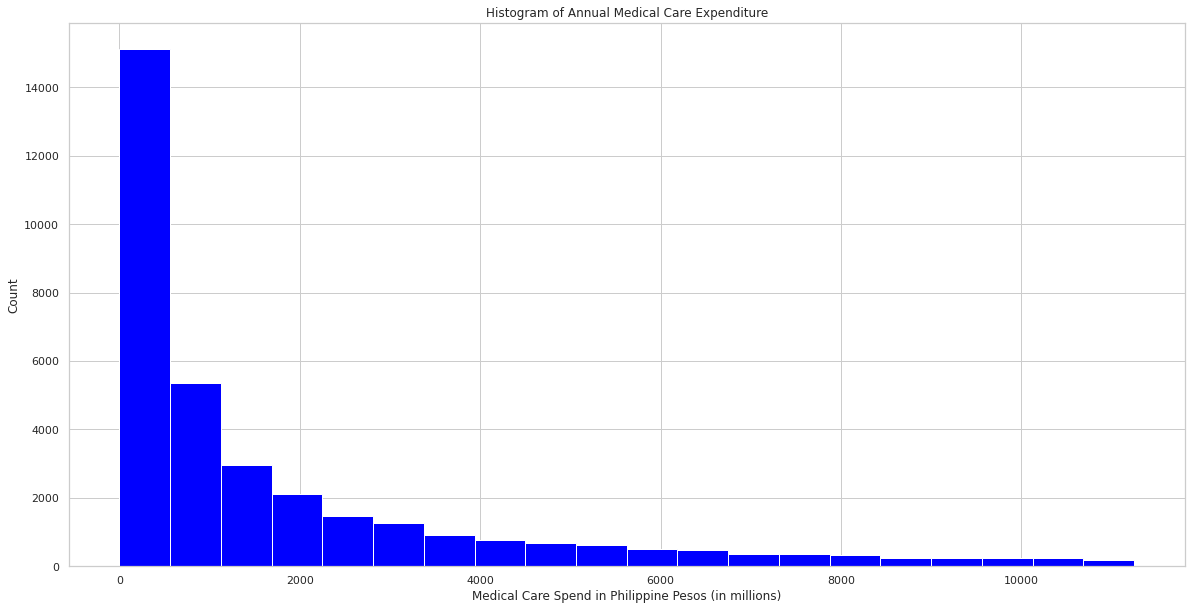

Bins and Edges for Medical Care Expenditure:
0.0  -  562.5 : 15129 counts
562.5  -  1125.0 : 5347 counts
1125.0  -  1687.5 : 2966 counts
1687.5  -  2250.0 : 2112 counts
2250.0  -  2812.5 : 1470 counts
2812.5  -  3375.0 : 1251 counts
3375.0  -  3937.5 : 906 counts
3937.5  -  4500.0 : 761 counts
4500.0  -  5062.5 : 668 counts
5062.5  -  5625.0 : 617 counts
5625.0  -  6187.5 : 517 counts
6187.5  -  6750.0 : 465 counts
6750.0  -  7312.5 : 368 counts
7312.5  -  7875.0 : 355 counts
7875.0  -  8437.5 : 321 counts
8437.5  -  9000.0 : 256 counts
9000.0  -  9562.5 : 249 counts
9562.5  -  10125.0 : 246 counts
10125.0  -  10687.5 : 238 counts
10687.5  -  11250.0 : 177 counts
Histogram Plot with KDE


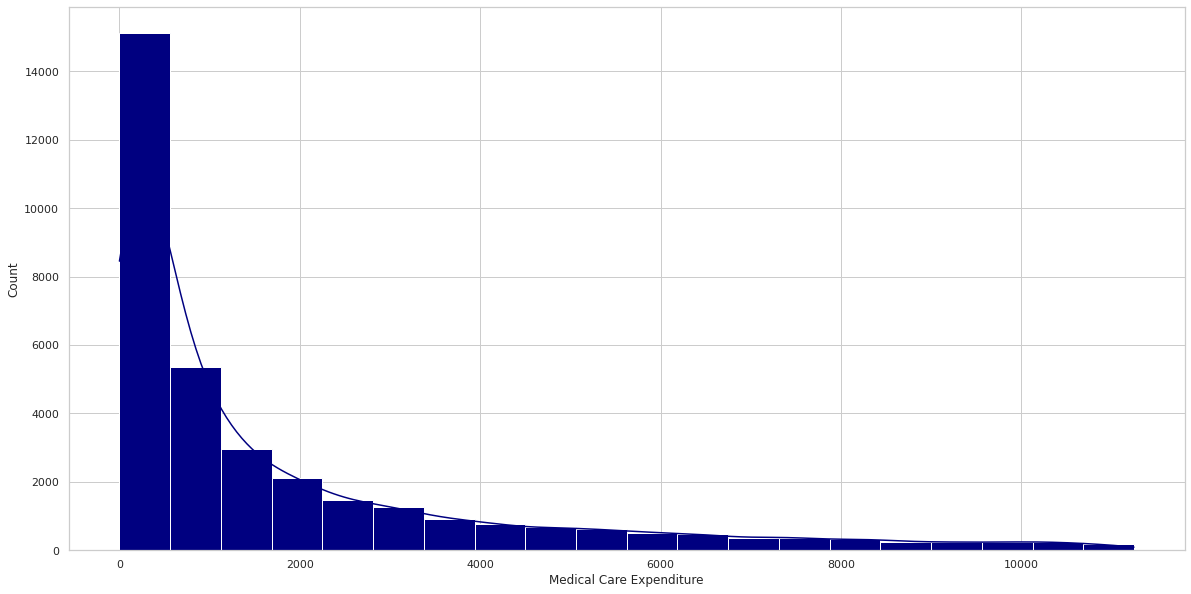

*** Attribute: Household Head Gender ***


<Figure size 7200x3600 with 0 Axes>

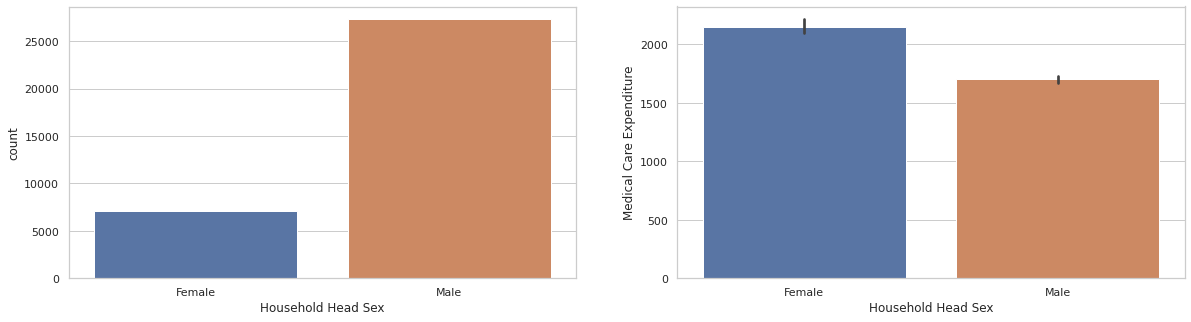

*** Attribute: Household Head Marital Status ***


<Figure size 7200x3600 with 0 Axes>

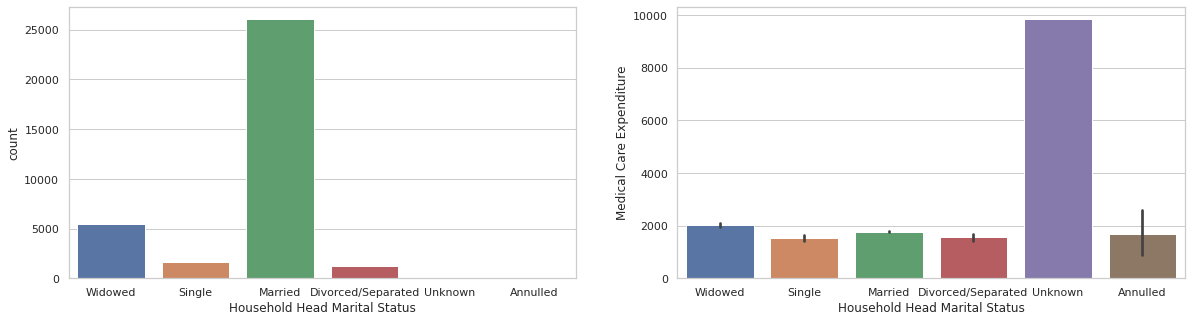

*** KDE Plot of Household Income vs Medical Care Expenditure ***


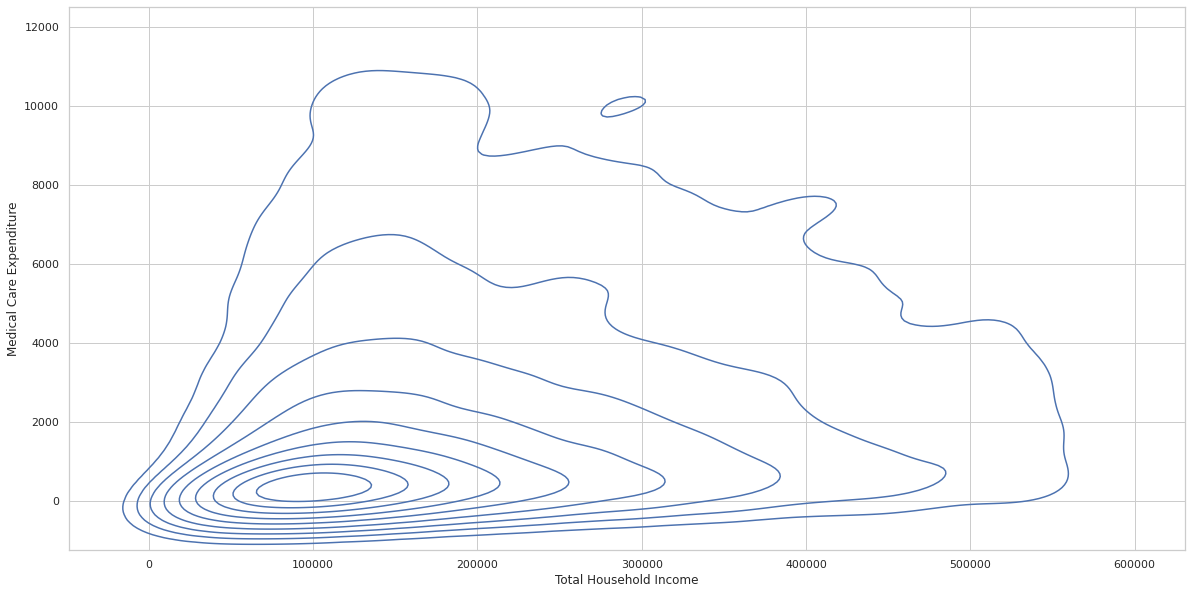

In [66]:
showGraphs(newstats.toPandas())

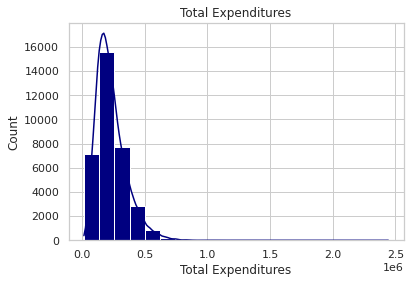

In [67]:
sns.histplot(data = newstats.toPandas()
            ,x = 'Total Expenditures'
            ,color = 'navy'
            ,alpha = 1
            ,bins = 20
            ,kde=True).set(title='Total Expenditures')
plt.show()

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Expenditures', ylabel='Density'>

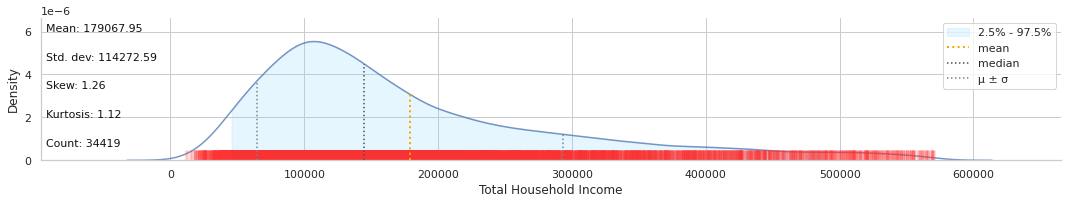

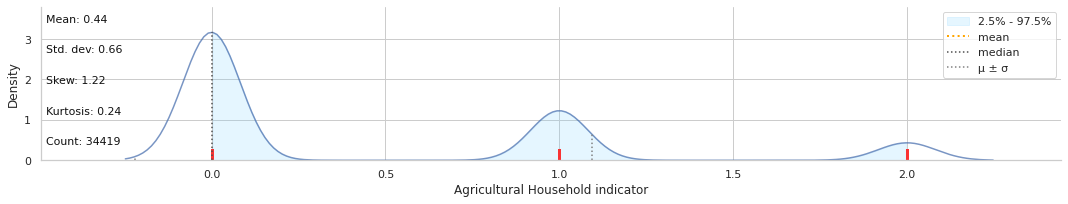

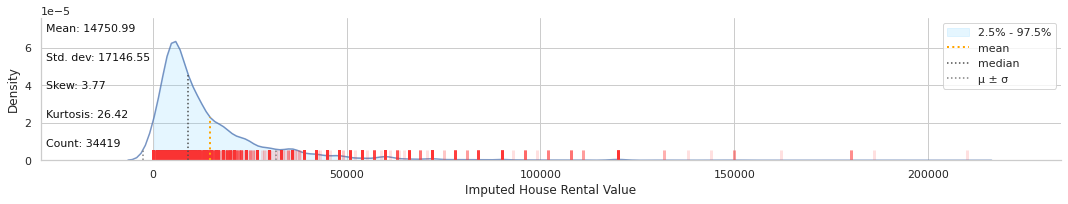

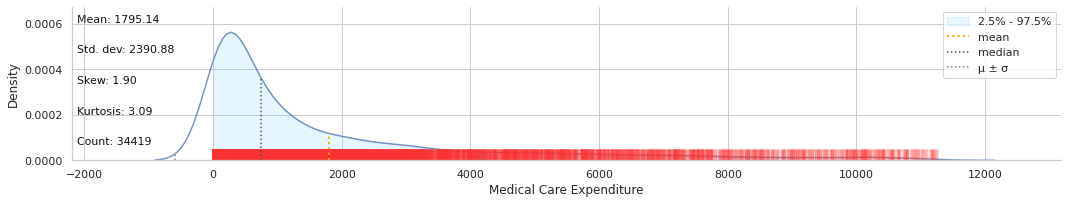

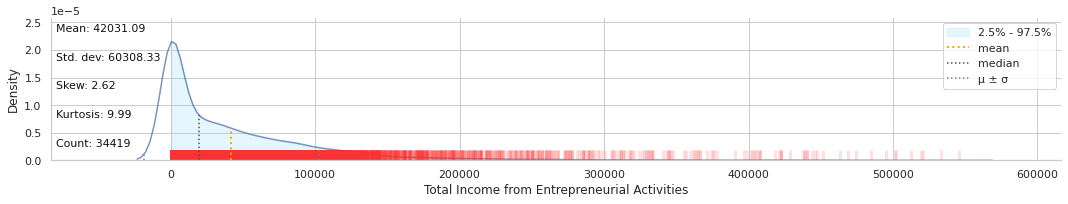

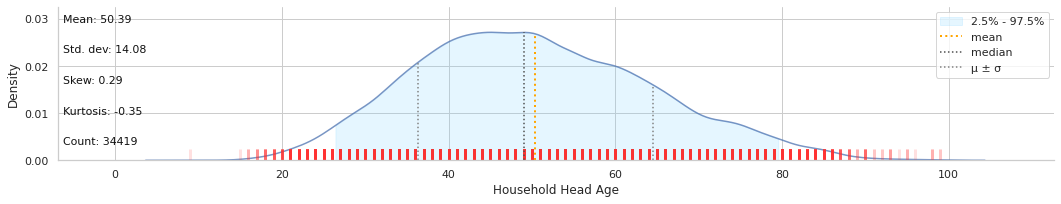

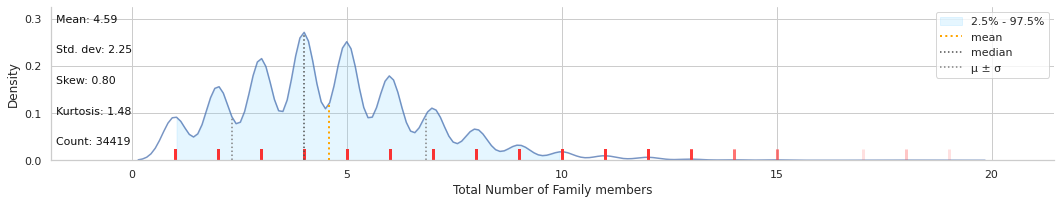

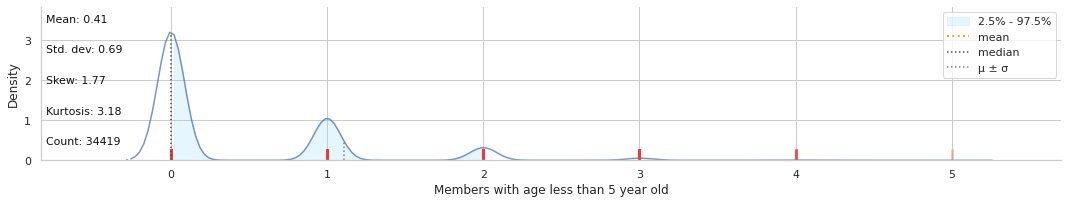

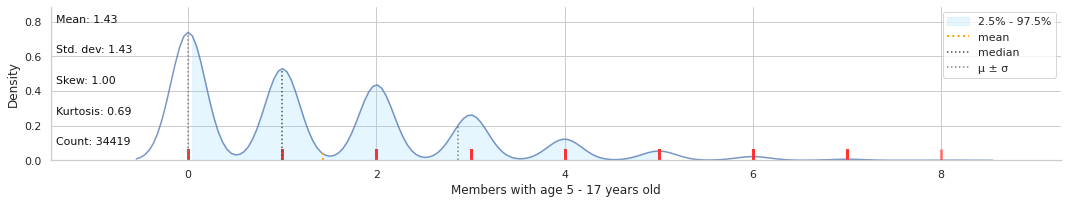

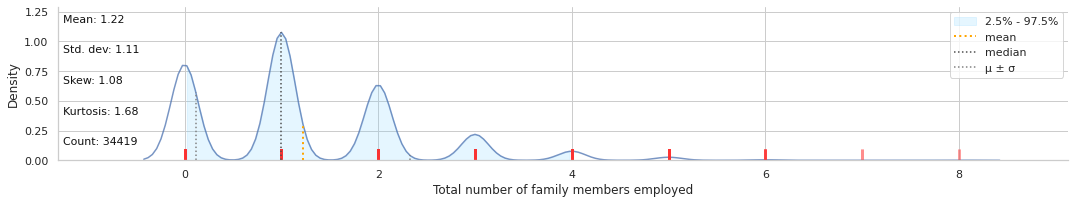

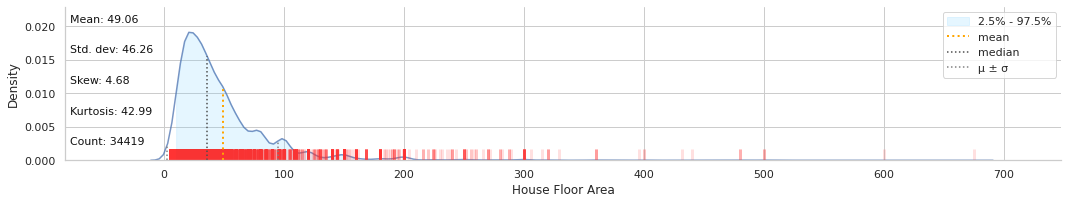

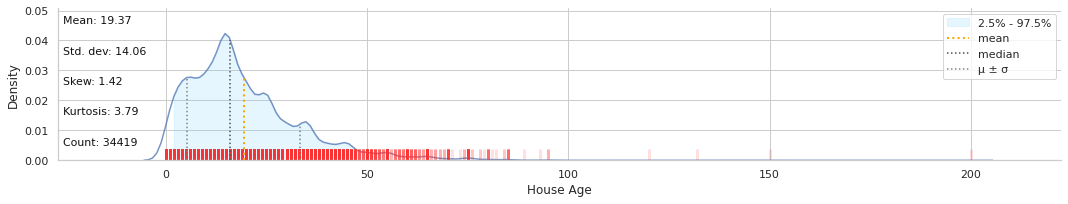

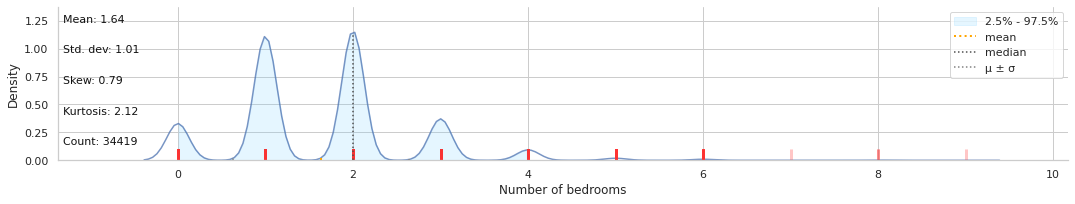

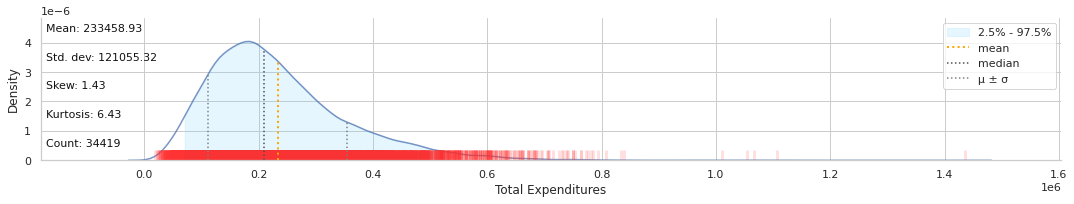

In [68]:
klib.dist_plot(newstats.toPandas(), showall=True)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

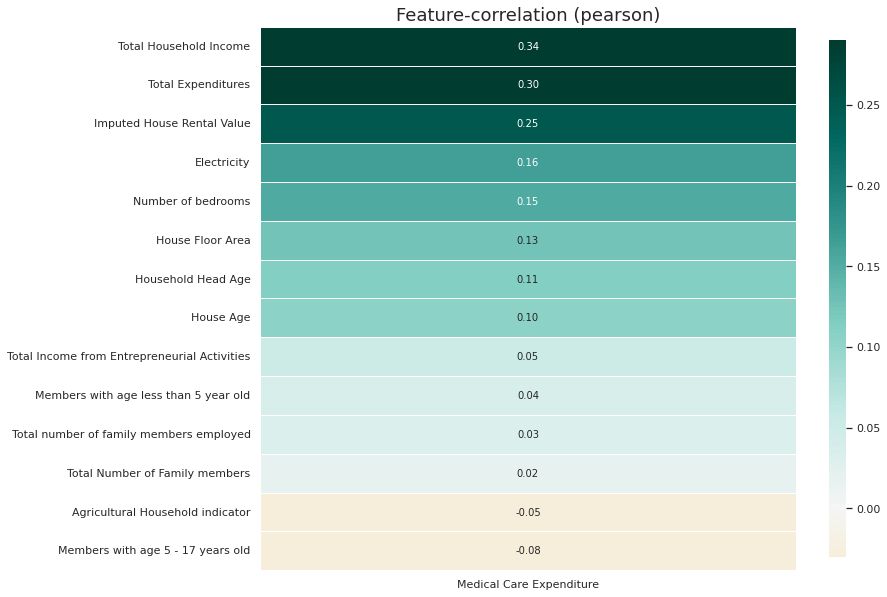

In [69]:
klib.corr_plot(newstats.toPandas(), target="Medical Care Expenditure")

### Converting Categorical Columns into Numeric

In [81]:
# adapted from the internet:
# https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa
# https://stackoverflow.com/questions/36942233/apply-stringindexer-to-several-columns-in-a-pyspark-dataframe

from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

#create a list of the columns that are string types
categoricalColumns = [item[0] for item in newstats.dtypes if item[1].startswith('string') ]

#define a list of stages in your pipeline. The string indexer will be one stage
stages = []

#iterate through all categorical values, create a string indexer, assign new column name with 'Index' at end
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + ' Index')
    stages += [stringIndexer]

#Create the pipeline. Assign the stages list to the pipeline key word stages
pipeline = Pipeline(stages = stages)
#fit the pipeline to our dataframe (pipelinemodel), then transform the dataframe
newstats = pipeline.fit(newstats).transform(newstats)


In [82]:
newstats.printSchema()
newstats.show(1, vertical=True)

root
 |-- Total Household Income: integer (nullable = true)
 |-- Main Source of Income: string (nullable = false)
 |-- Agricultural Household indicator: integer (nullable = true)
 |-- Imputed House Rental Value: integer (nullable = true)
 |-- Medical Care Expenditure: integer (nullable = true)
 |-- Total Income from Entrepreneurial Activities: integer (nullable = true)
 |-- Household Head Sex: string (nullable = false)
 |-- Household Head Age: integer (nullable = true)
 |-- Household Head Marital Status: string (nullable = false)
 |-- Household Head Highest Grade Completed: string (nullable = false)
 |-- Household Head Job or Business Indicator: string (nullable = false)
 |-- Household Head Occupation: string (nullable = false)
 |-- Household Head Class of Worker: string (nullable = false)
 |-- Type of Household: string (nullable = false)
 |-- Total Number of Family members: integer (nullable = true)
 |-- Members with age less than 5 year old: integer (nullable = true)
 |-- Members wit

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

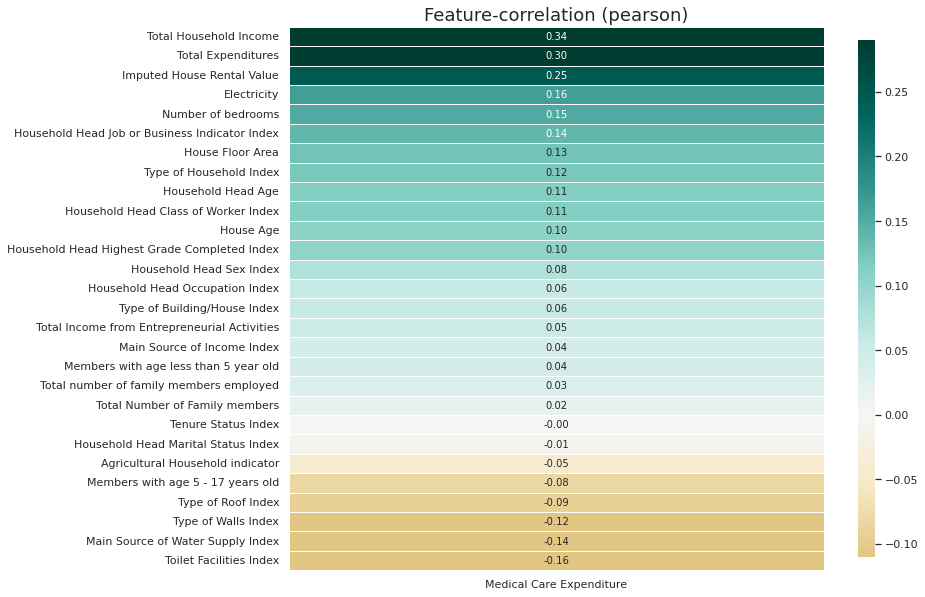

In [88]:
klib.corr_plot(newstats.toPandas(), target="Medical Care Expenditure")

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

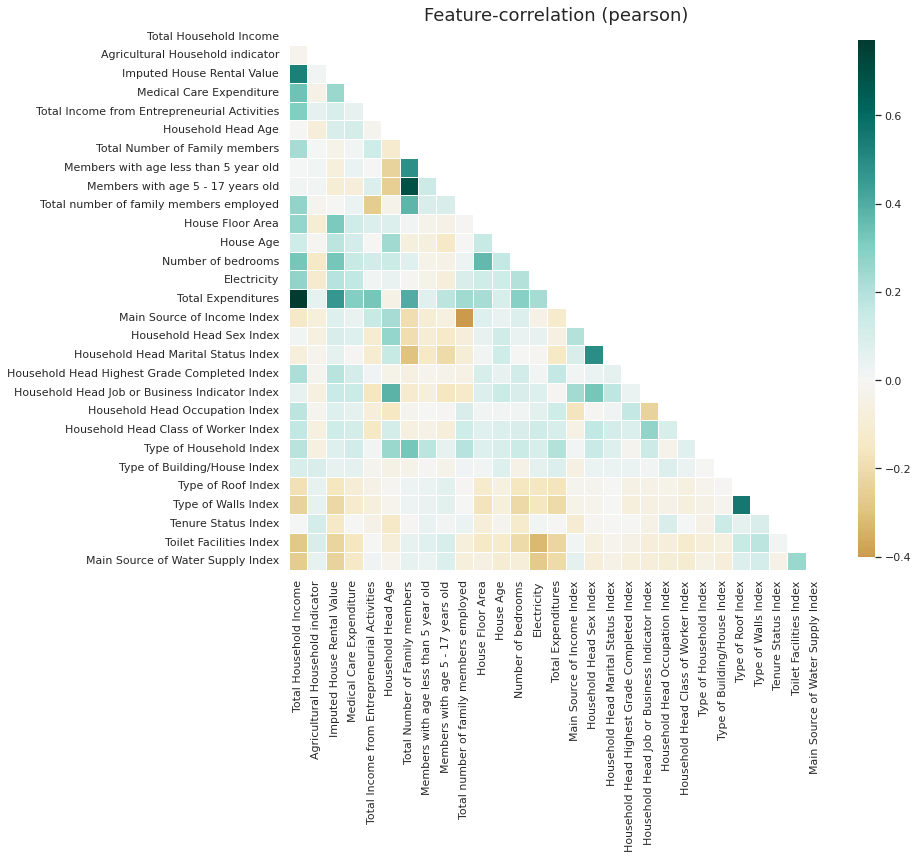

In [89]:
klib.corr_plot(newstats.toPandas(),annot=False)

### Linear Regression

In [83]:
# import LinearRegression 
from pyspark.ml.regression import LinearRegression
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

Prepare data to input to model

In [90]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=["Total Household Income", "Main Source of Income Index", 
            "Agricultural Household indicator","Imputed House Rental Value",
            "Total Income from Entrepreneurial Activities",
            "Household Head Age", "Total Number of Family members",
            "Members with age less than 5 year old","Members with age 5 - 17 years old",
            "Total number of family members employed", "House Floor Area",
             "House Age","Number of bedrooms",
             "Electricity","Total Expenditures",
             "Main Source of Income Index","Household Head Sex Index",
             "Household Head Marital Status Index","Household Head Highest Grade Completed Index",
             "Household Head Job or Business Indicator Index","Household Head Occupation Index",
             "Household Head Class of Worker Index","Type of Household Index",
             "Type of Building/House Index","Type of Roof Index","Type of Walls Index",
             "Tenure Status Index","Toilet Facilities Index",
             "Main Source of Water Supply Index"],
    outputCol="features")
output = assembler.transform(newstats)

In [91]:
# Using print schema, you see that the features output column has been added. 
output.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

root
 |-- Total Household Income: integer (nullable = true)
 |-- Main Source of Income: string (nullable = false)
 |-- Agricultural Household indicator: integer (nullable = true)
 |-- Imputed House Rental Value: integer (nullable = true)
 |-- Medical Care Expenditure: integer (nullable = true)
 |-- Total Income from Entrepreneurial Activities: integer (nullable = true)
 |-- Household Head Sex: string (nullable = false)
 |-- Household Head Age: integer (nullable = true)
 |-- Household Head Marital Status: string (nullable = false)
 |-- Household Head Highest Grade Completed: string (nullable = false)
 |-- Household Head Job or Business Indicator: string (nullable = false)
 |-- Household Head Occupation: string (nullable = false)
 |-- Household Head Class of Worker: string (nullable = false)
 |-- Type of Household: string (nullable = false)
 |-- Total Number of Family members: integer (nullable = true)
 |-- Members with age less than 5 year old: integer (nullable = true)
 |-- Members wit

[Row(Total Household Income=301900, Main Source of Income='Wage/Salaries', Agricultural Household indicator=0, Imputed House Rental Value=72000, Medical Care Expenditure=480, Total Income from Entrepreneurial Activities=0, Household Head Sex='Female', Household Head Age=73, Household Head Marital Status='Widowed', Household Head Highest Grade Completed='Elementary Graduate', Household Head Job or Business Indicator='No Job/Business', Household Head Occupation='Not Specified', Household Head Class of Worker='Not Specified', Type of Household='Extended Family', Total Number of Family members=4, Members with age less than 5 year old=0, Members with age 5 - 17 years old=0, Total number of family members employed=1, Type of Building/House='Single house', Type of Roof='Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)', Type of Walls='Strong', House Floor Area=25, House Age=15, Number of bedrooms=2, Tenure Status='Own or owner-like possession of house and lot', Toilet Fa

In [92]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data = output.select("features",'Medical Care Expenditure')
final_data.show()

+--------------------+------------------------+
|            features|Medical Care Expenditure|
+--------------------+------------------------+
|(29,[0,3,5,6,9,10...|                     480|
|(29,[0,1,5,6,10,1...|                       0|
|(29,[0,5,6,8,9,10...|                       0|
|(29,[0,1,3,5,6,9,...|                    6512|
|(29,[0,3,5,6,9,10...|                     180|
|(29,[0,5,6,7,9,10...|                     975|
|(29,[0,3,5,6,9,10...|                    8790|
|(29,[0,3,5,6,8,9,...|                    3310|
|(29,[0,1,3,4,5,6,...|                       0|
|[259090.0,1.0,0.0...|                       0|
|(29,[0,3,4,5,6,9,...|                     303|
|(29,[0,3,5,6,8,9,...|                       0|
|(29,[0,3,4,5,6,8,...|                     580|
|[113000.0,1.0,0.0...|                      54|
|(29,[0,3,5,6,9,10...|                    1035|
|[500283.0,0.0,0.0...|                    6631|
|(29,[0,3,5,6,9,10...|                    8133|
|(29,[0,3,5,6,8,9,...|                  

In [93]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [94]:
# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   23980|
|   mean|      1793.9588407005838|
| stddev|       2387.053631975483|
|    min|                       0|
|    max|                   11248|
+-------+------------------------+



+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   10439|
|   mean|      1797.8496024523422|
| stddev|      2399.7720422468383|
|    min|                       0|
|    max|                   11250|
+-------+------------------------+



Create Linear Regression Model

In [96]:
lr = LinearRegression(labelCol='Medical Care Expenditure')
lrModel = lr.fit(train_data) # Fit the model to the data.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

22/10/12 02:24:12 WARN Instrumentation: [15746893] regParam is zero, which might cause numerical instability and overfitting.
22/10/12 02:24:12 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/12 02:24:12 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/10/12 02:24:14 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Coefficients: [0.003982386306385188,167.8830710811891,-86.93240538300289,0.004234756206362789,-0.0018313034653289887,14.327884038510831,-129.92055263993913,381.84982135162056,2.9084681582546827,-51.60809627955917,0.49957137059834233,2.0913174374045216,6.614695534775168,289.0083212544251,0.002894339064536347,-36.80690780102916,47.74162074789509,-141.32958660146917,7.370776186031413,344.2228968364253,1.39903068577903,26.823493605509807,219.63981353480304,126.77872422207773,-13.370045737989523,-23.921176145455988,34.74911823218554,-39.51513152894482,-22.614817502408957] Intercept: -293.4198058051456


In [97]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [98]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------------------+
|          residuals|
+-------------------+
|-2402.8640735621043|
|-2806.0897416125786|
| -813.4310305253962|
| 2189.3265820206966|
|   671.999400971129|
|-2293.8651369957306|
| -516.6057276922197|
|  8310.200299597365|
| -626.2402481921536|
| 2570.0291532986816|
|-1610.5428807165777|
|-2625.8402232922544|
|-1742.3200911372792|
|-1206.0365795085859|
| -1290.310208917644|
|  4796.432704683042|
| -994.2354761446486|
| -243.3363991632782|
|  2550.168231426758|
| -2910.571164045501|
+-------------------+
only showing top 20 rows



In [100]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

RSME: 2184.7632069075594
R2: 0.17108428573170897


In [101]:
final_data.describe().show()

+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   34419|
|   mean|       1795.138876783172|
| stddev|       2390.883958965919|
|    min|                       0|
|    max|                   11250|
+-------+------------------------+



In [102]:
# Let's just select the features column (removing the label column).
unlabeled_data = test_data.select('features')
unlabeled_data.show()
# Now we can transform the unlabeled data.
predictions = lrModel.transform(unlabeled_data)
# It worked! Feeding the unlabeled data features into the model results in a prediction, 
# which is the amount someone with those features is likely to spend in a year.
predictions.show()
predictions.head(1)

+--------------------+
|            features|
+--------------------+
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
|(29,[0,1,2,3,4,5,...|
+--------------------+
only showing top 20 rows

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|(29,[0,1,2,3,4,5,...|2608.8640735621043|
|(29,[0,1,2,3,4,5,...|2806.0897416125786|
|(29,[0,1,2,3,4,5,...|1113.4310305253962|
|(29,[0,1,2,3,4,5,...|2295.6734179793034|
|(29,[0,1,2,3,4,5,...| 2891.000599028871|
|(29,[0,1,2,3,4,5,...|2293.8651369957306|
|(29,[0,1,2,3,4,5,...|2066.6057276922197|
|(

[Row(features=SparseVector(29, {0: 324590.0, 1: 2.0, 2: 2.0, 3: 36000.0, 4: 133780.0, 5: 34.0, 6: 7.0, 7: 1.0, 8: 4.0, 10: 42.0, 11: 18.0, 12: 2.0, 13: 1.0, 14: 368924.0, 15: 2.0, 20: 153.0}), prediction=2608.8640735621043)]

### Logistic Regression

In [111]:
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(featuresCol='features',labelCol='Medical Care Expenditure')

ConnectionRefusedError: [Errno 111] Connection refused

In [ ]:
# Lists everything we want to do, like Index data, encode data, assemble data and then pass in the actual model.
pipeline = Pipeline(stages=[log_reg])

# we already have a split from earlier:
# train_data,test_data = final_data.randomSplit([0.7,0.3])

# Note pipeline. Call it as you would call a machine learning object.
fit_model = pipeline.fit(train_data)

# Transform test data. 
results = fit_model.transform(test_data)

In [110]:
# Evaluate the model using the binary classifer.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='Medical Care Expenditure')
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
results.select('Medical Care Expenditure','prediction').show()

ConnectionRefusedError: [Errno 111] Connection refused

In [ ]:
# We can then evaluate using AUC (area under the curve). AUC is linked to ROC.
AUC = my_eval.evaluate(results)